# Step 1 EDA, sorting out, some cleaning...


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Openning data set
housestest = r"C:\Users\nonox\University\City\First semestre\ML\Coursework\Data\test.csv"
housestest = housestest.replace("\\","/")
housestest = pd.read_csv(housestest)
print(housestest.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Openning data set
houses = r"C:\Users\nonox\University\City\First semestre\ML\Coursework\Data\train.csv"
houses = houses.replace("\\","/")
houses = pd.read_csv(houses)
print(houses.columns)
print(houses.head())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
 # Check data types
print(houses.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


In [4]:
# Statistics for the target variable.
print(houses['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


## Missing Values.


In [5]:

# Create a list with missing values (if any)
missing_values = houses.columns[houses.isnull().any()]

# Print colunns' names with missing values as well as counting the total amount of them for each column.
print(houses[missing_values].isnull().sum().sort_values(ascending=False))
houses.shape

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


(1460, 81)

In [6]:
print(houses['Fence'])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1455      NaN
1456    MnPrv
1457    GdPrv
1458      NaN
1459      NaN
Name: Fence, Length: 1460, dtype: object


           Since we have 80 columns and columns with the highest % of missing values are not that important, 
           any column with a percentage of missing values higher than 7% will be removed.

In [7]:
# % of missing values for each column:
missing_percentage = houses.isnull().mean() * 100

# Now exclude columns with a missing % higher than 7% and keep the others using .index
final_columns = missing_percentage[missing_percentage <= 7].index 

# Cleaned dataset
houses = houses[final_columns]

print(missing_percentage)

# source: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [8]:
# Checking missing values again
missing_values = houses.columns[houses.isnull().any()]

print(houses[missing_values].isnull().sum().sort_values(ascending=False))
houses.shape

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64


(1460, 75)

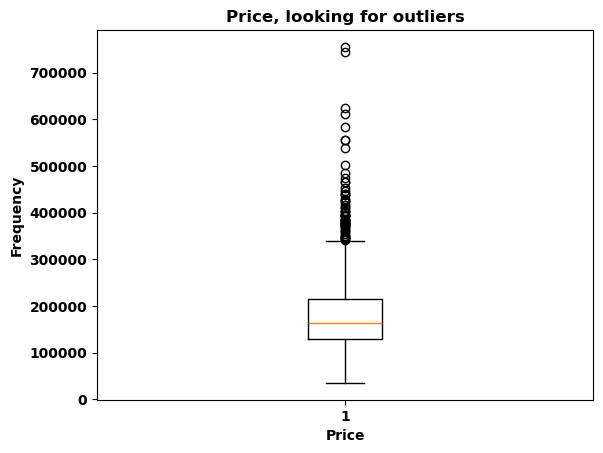

755000
34900


In [9]:
# Checking for outliers in price column
plt.boxplot(houses['SalePrice'])

plt.title('Price, looking for outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()
print(houses['SalePrice'].max())
print(houses['SalePrice'].min())


In [10]:
print(houses['SalePrice'].dtype)

int64


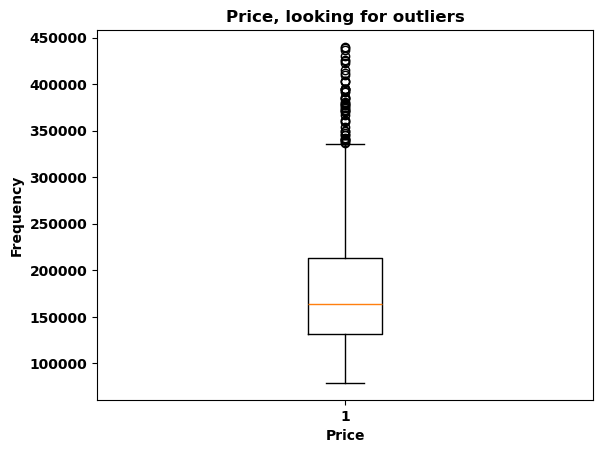

440000
79000


In [11]:
# Calculate the lower and upper bounds for the 'SalePrice' 
lower_bound = houses['SalePrice'].quantile(0.02)
upper_bound = houses['SalePrice'].quantile(0.99)

# Create a mask for values within the quantile range, mask use booleans to filter data.
mask = (houses['SalePrice'] >= lower_bound) & (houses['SalePrice'] <= upper_bound)

# Apply the mask to the DataFrame to filter out outliers
houses = houses[mask].copy()

# Optional: reset the index of the filtered DataFrame
houses.reset_index(drop=True, inplace=True)

# Checking for outliers in price column
plt.boxplot(houses['SalePrice'])


plt.title('Price, looking for outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()
print(houses['SalePrice'].max())
print(houses['SalePrice'].min())

# https://stackoverflow.com/questions/38802675/create-bool-mask-from-filter-results-in-pandas
# https://towardsdatascience.com/boolean-masking-with-pandas-b21b7714d0b6
# https://stackoverflow.com/questions/38802675/create-bool-mask-from-filter-results-in-pandas
# 

In [12]:
print(houses['SalePrice'].describe())

count      1416.000000
mean     179474.604520
std       68241.301773
min       79000.000000
25%      131300.000000
50%      164000.000000
75%      213492.500000
max      440000.000000
Name: SalePrice, dtype: float64


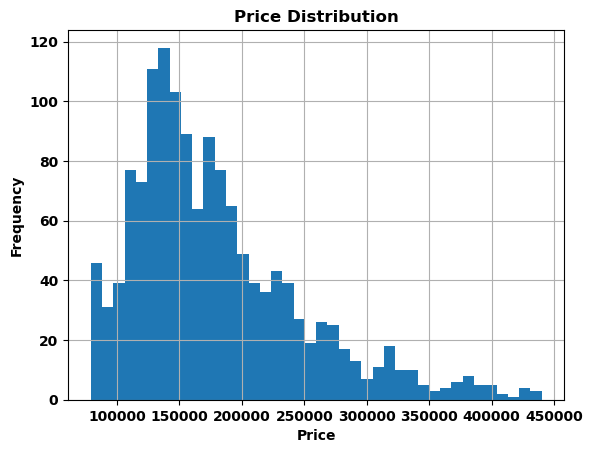

In [13]:
# Checking price's distribution through a histogram
houses['SalePrice'].hist(bins=40)

# Labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [14]:
# Checking for correlations related to our target variable (prices)
# Calculate house correlations
house_corr = houses.corr()

# Select correlations for SalePrice, order the figures
sale_price_corr = house_corr['SalePrice'].sort_values(ascending=False)
print(sale_price_corr)

SalePrice        1.000000
OverallQual      0.789984
GrLivArea        0.667017
GarageCars       0.640318
GarageArea       0.616654
TotalBsmtSF      0.581849
1stFlrSF         0.570369
FullBath         0.543442
YearBuilt        0.540150
YearRemodAdd     0.518040
GarageYrBlt      0.494919
TotRmsAbvGrd     0.483128
Fireplaces       0.452682
MasVnrArea       0.425674
BsmtFinSF1       0.340322
OpenPorchSF      0.320678
WoodDeckSF       0.320228
2ndFlrSF         0.280875
HalfBath         0.263950
LotArea          0.248484
BsmtFullBath     0.229959
BsmtUnfSF        0.219739
BedroomAbvGr     0.143468
ScreenPorch      0.078035
MoSold           0.072096
3SsnPorch        0.055219
PoolArea         0.033269
MiscVal         -0.013343
BsmtFinSF2      -0.014688
YrSold          -0.018029
Id              -0.038382
BsmtHalfBath    -0.039552
LowQualFinSF    -0.066308
MSSubClass      -0.097690
EnclosedPorch   -0.120137
OverallCond     -0.124490
KitchenAbvGr    -0.151418
Name: SalePrice, dtype: float64


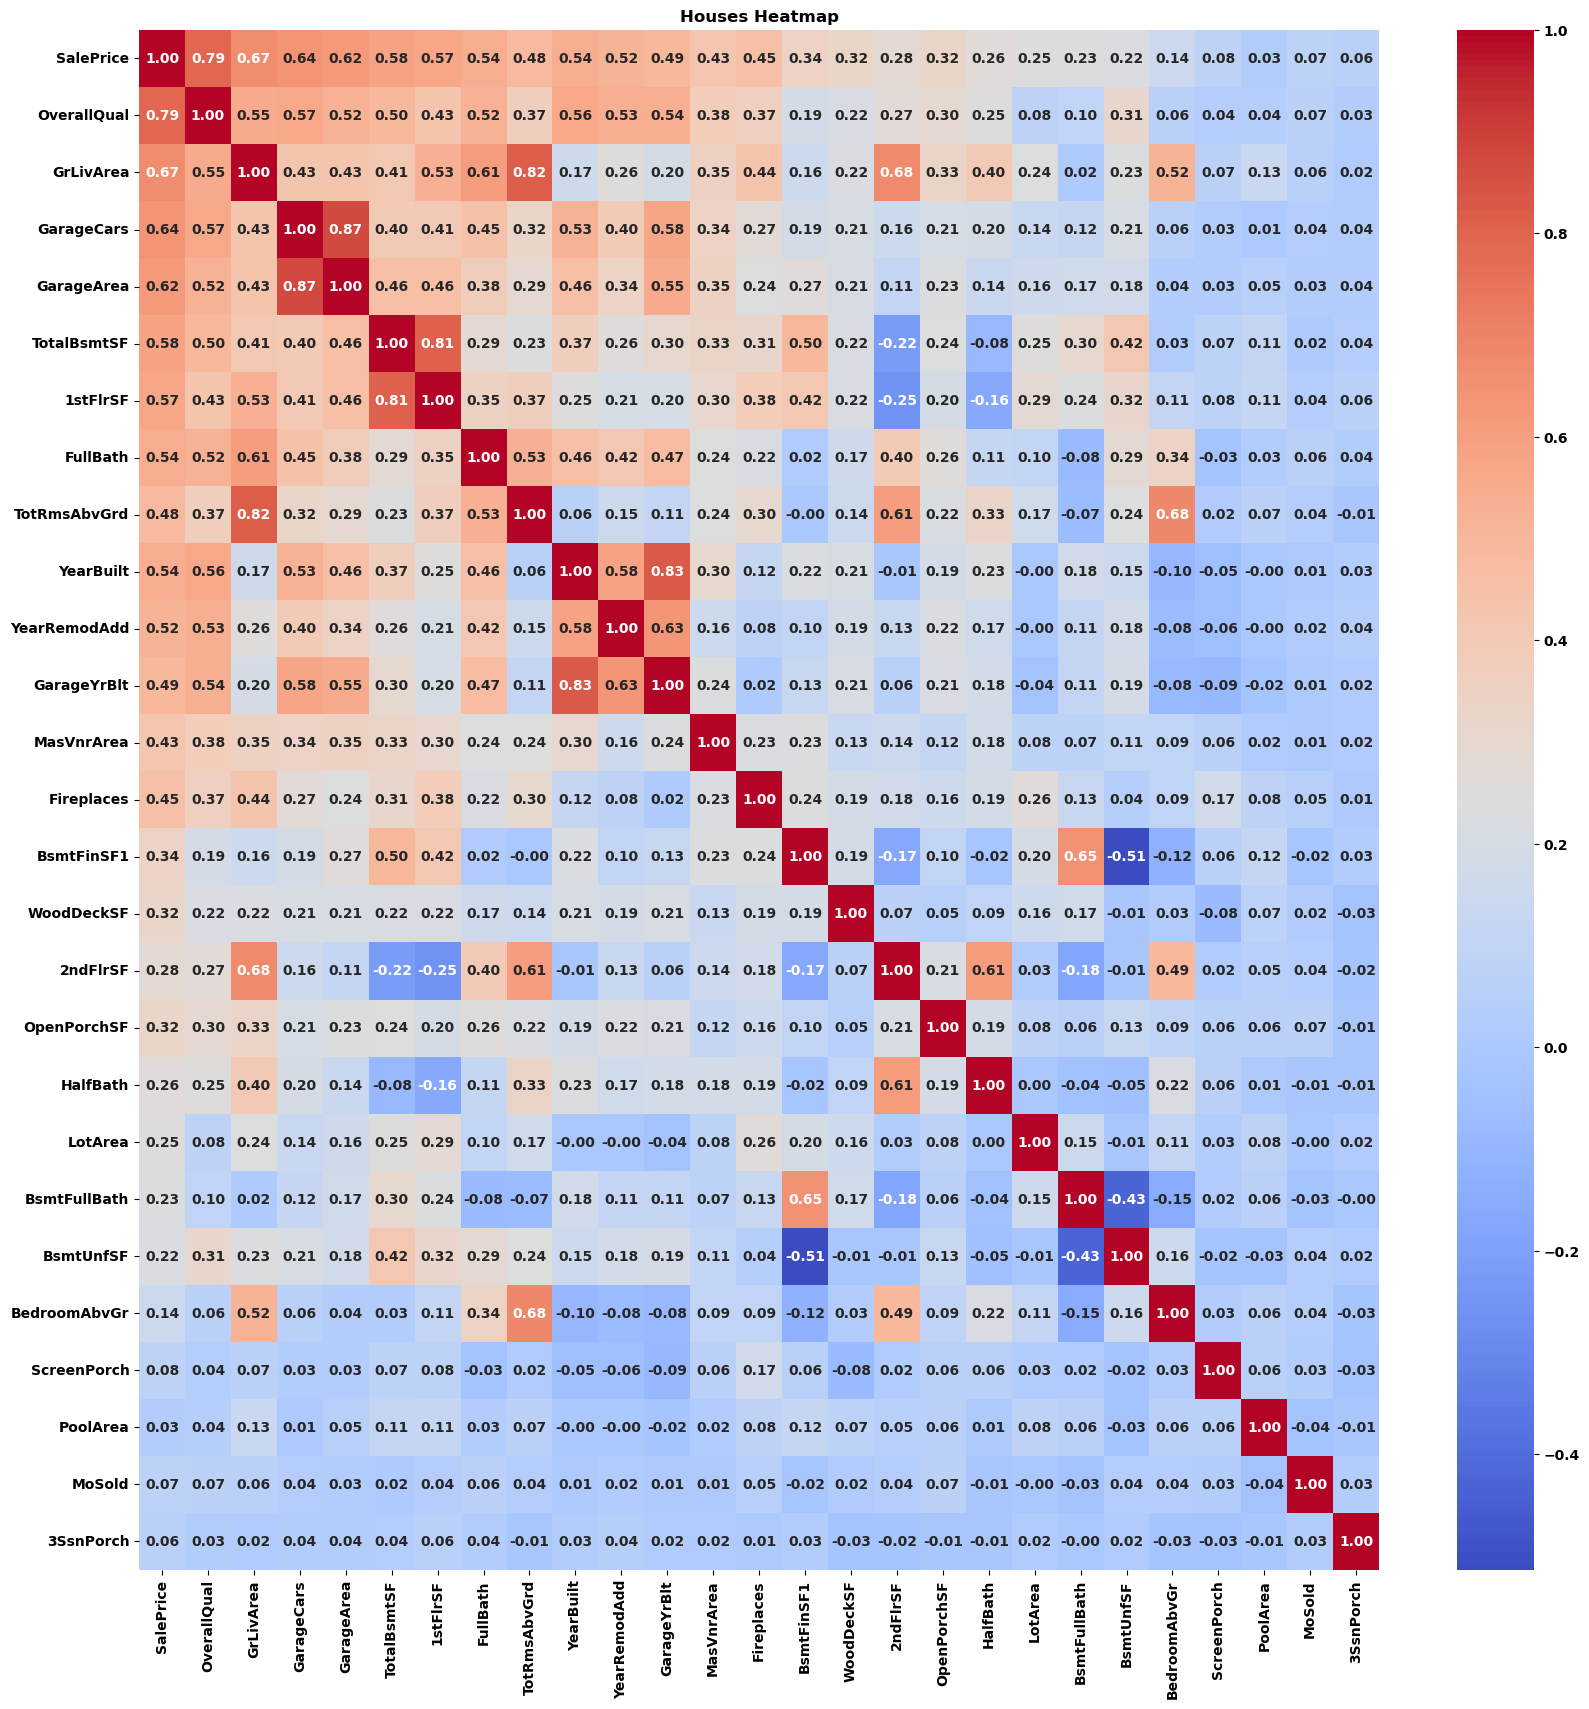

In [15]:
# Creation of heatmap with all positive correlations.
# Columns to consider part 1
columns = [ 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
    'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 
    'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 
    'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 
    'PoolArea', 'MoSold', '3SsnPorch'
          ]

# Correlation Matrix
houses_corr = houses[columns].corr()

# Creating the heat map
plt.figure(figsize=(20,20)) 
sns.heatmap(houses_corr, annot=True, fmt=".2f", cmap='coolwarm')

# Labelling
plt.title('Houses Heatmap')ds

plt.show()

In [16]:
# Checking categorical data
# Filtering categorical data
categorical_columns = houses.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


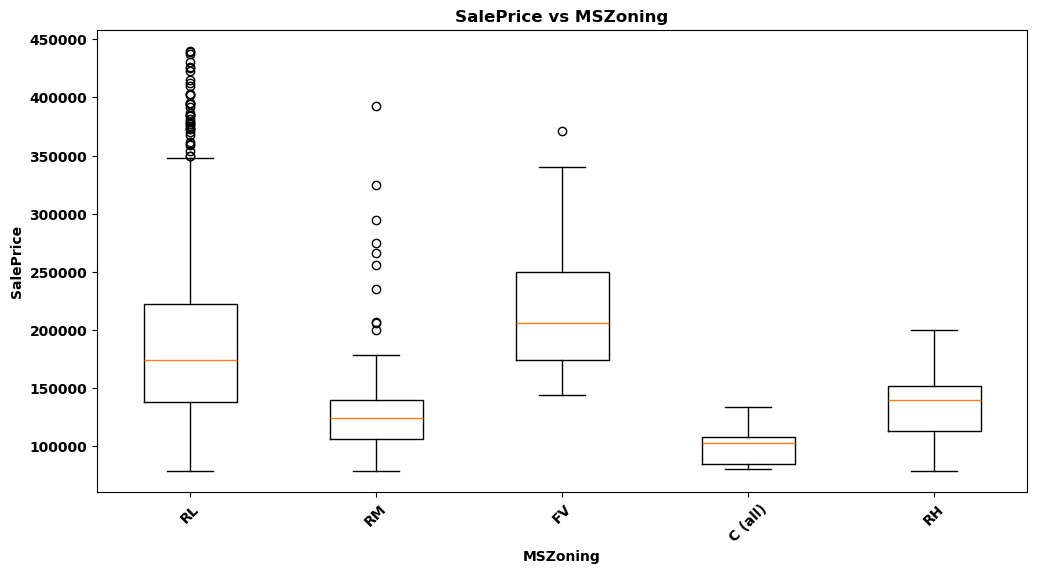

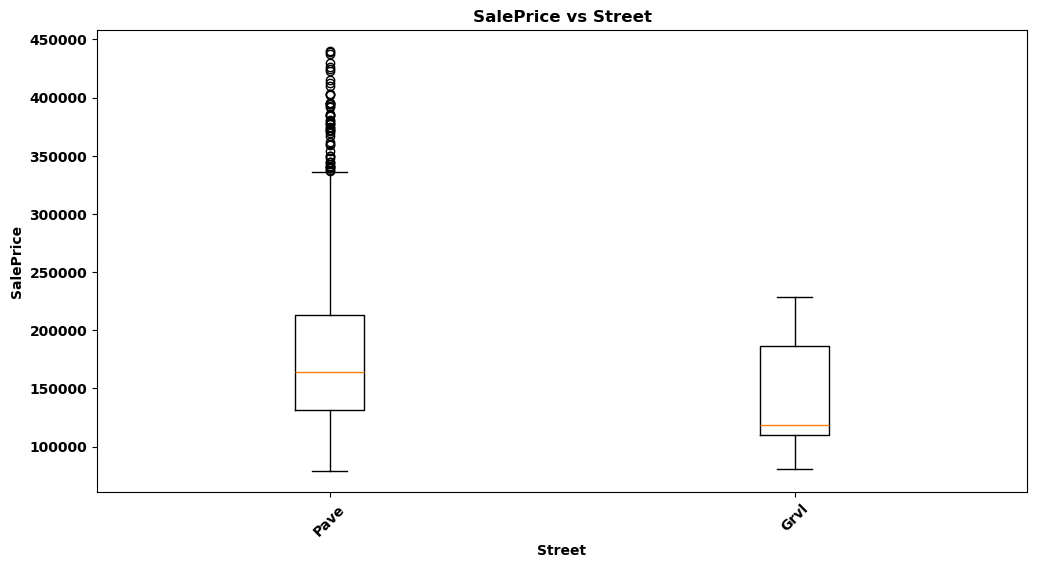

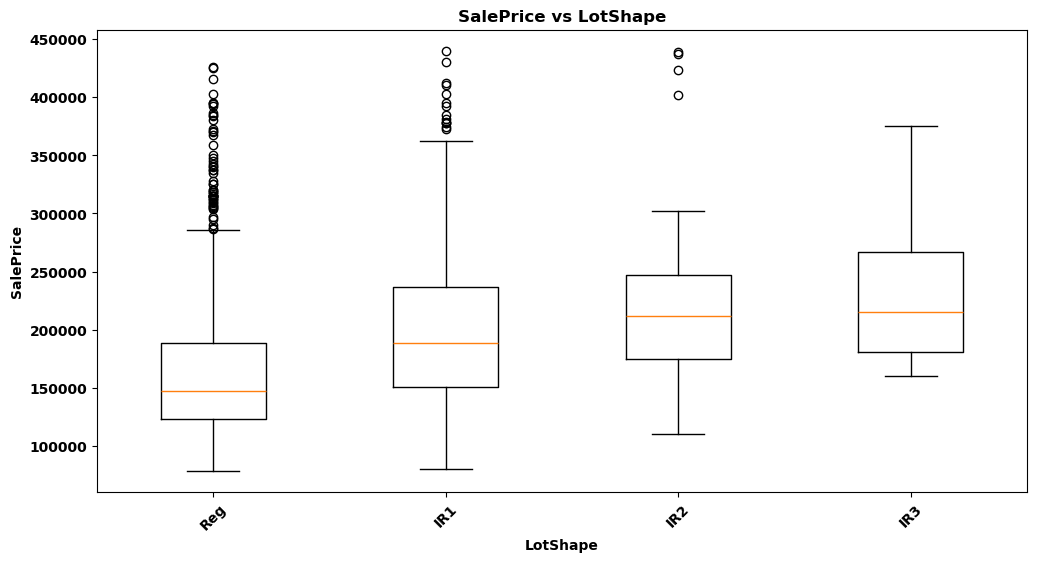

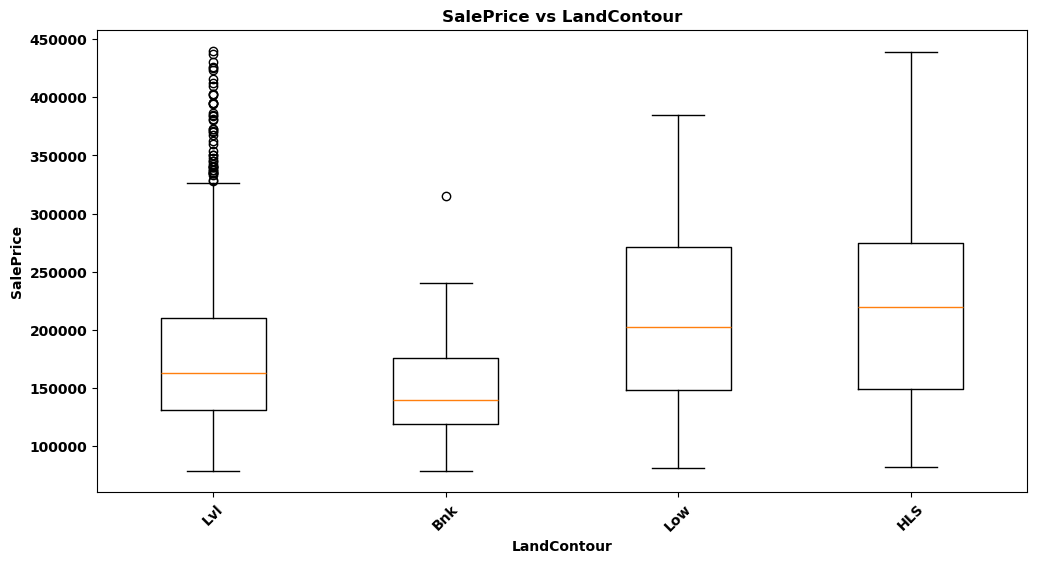

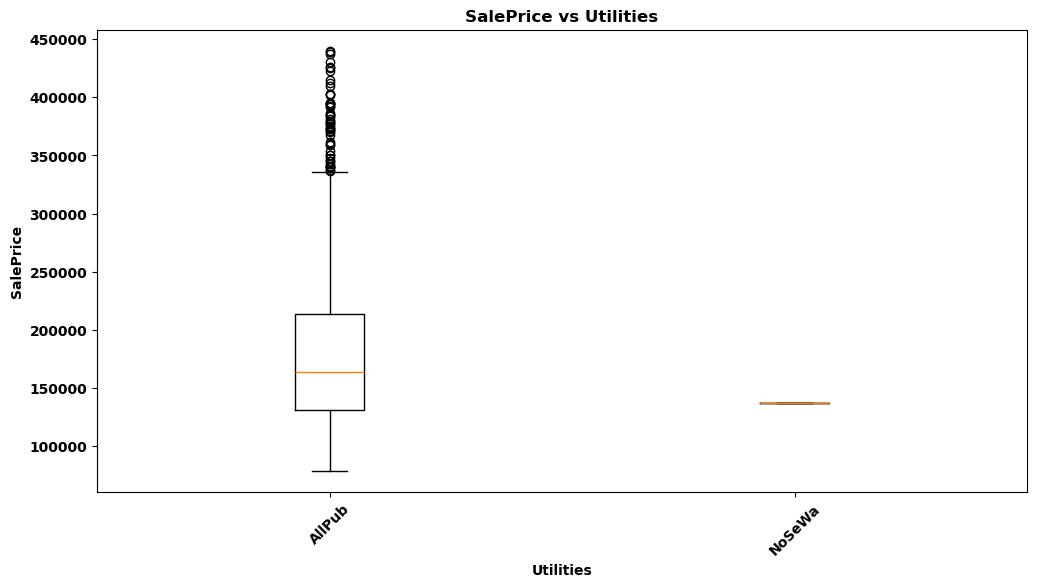

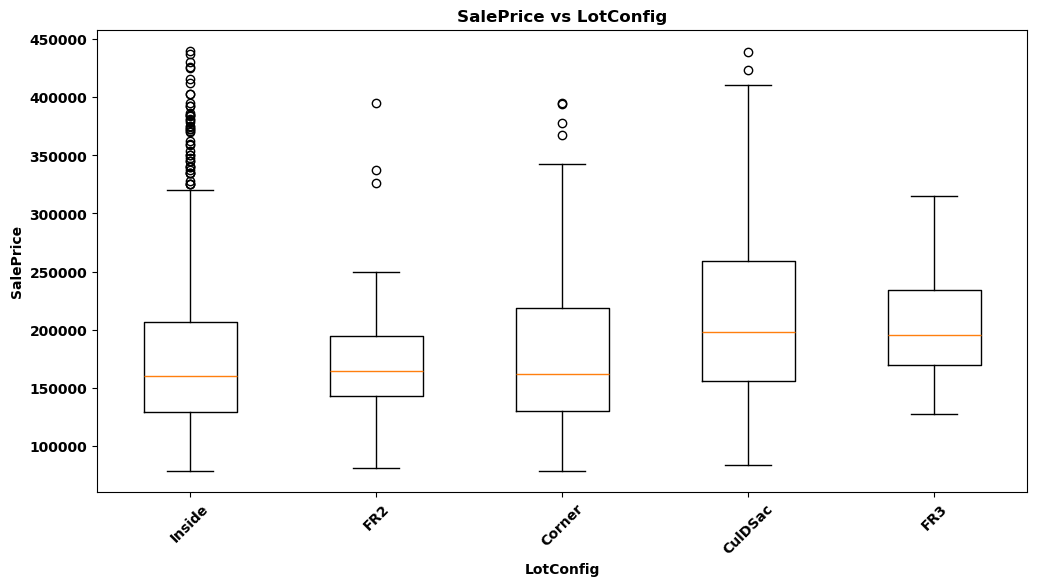

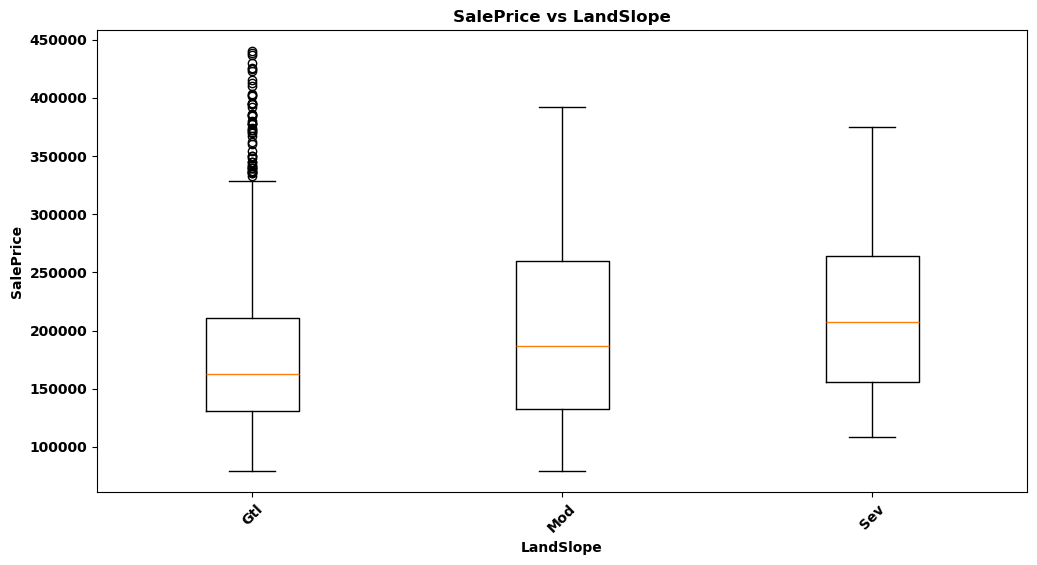

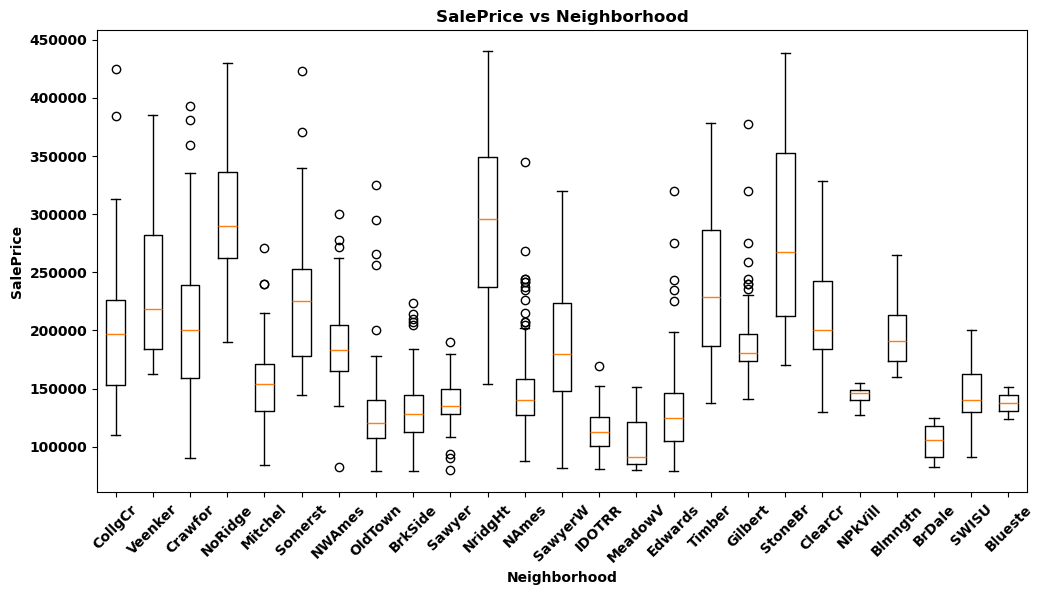

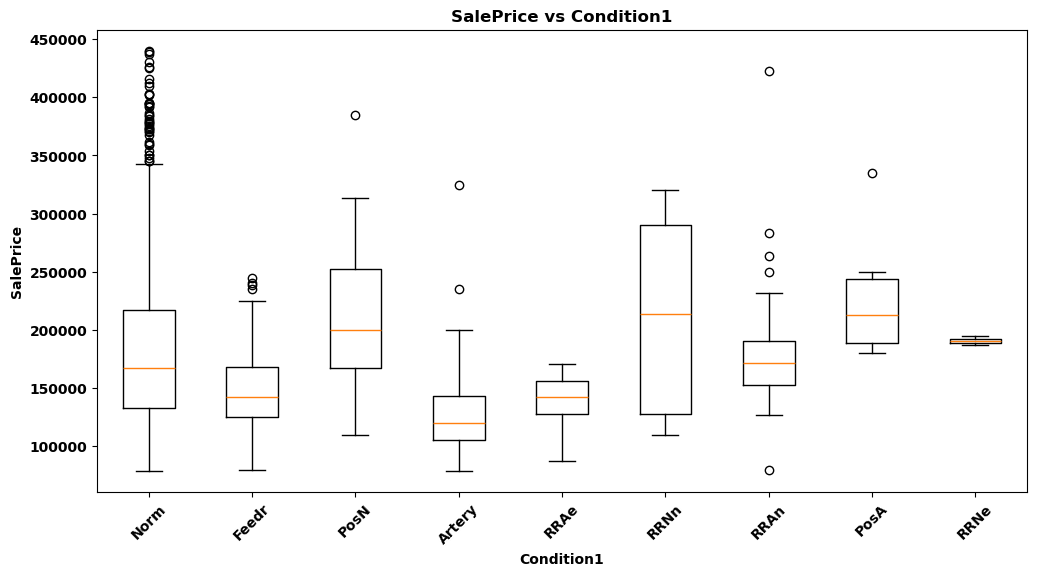

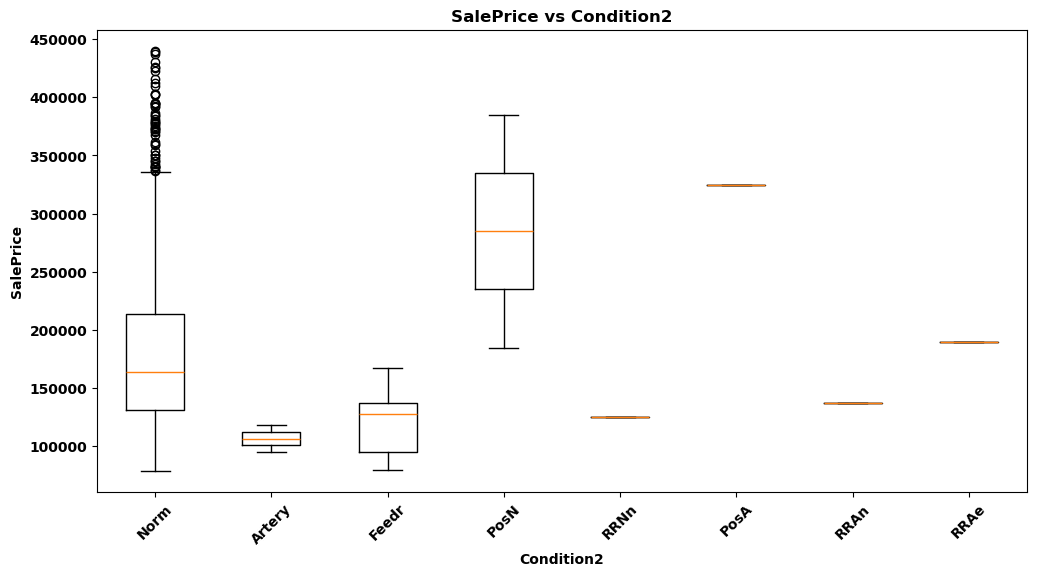

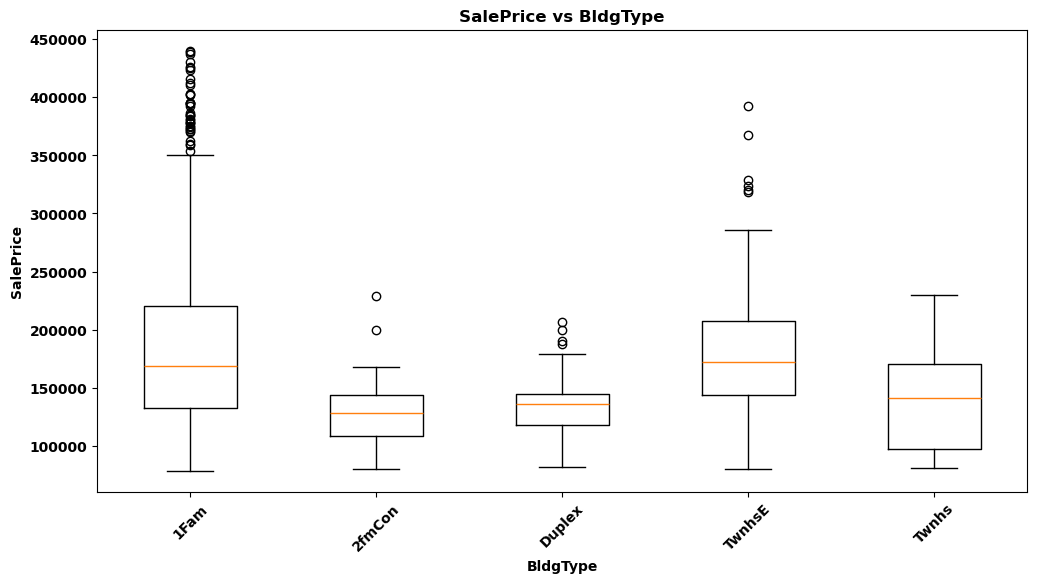

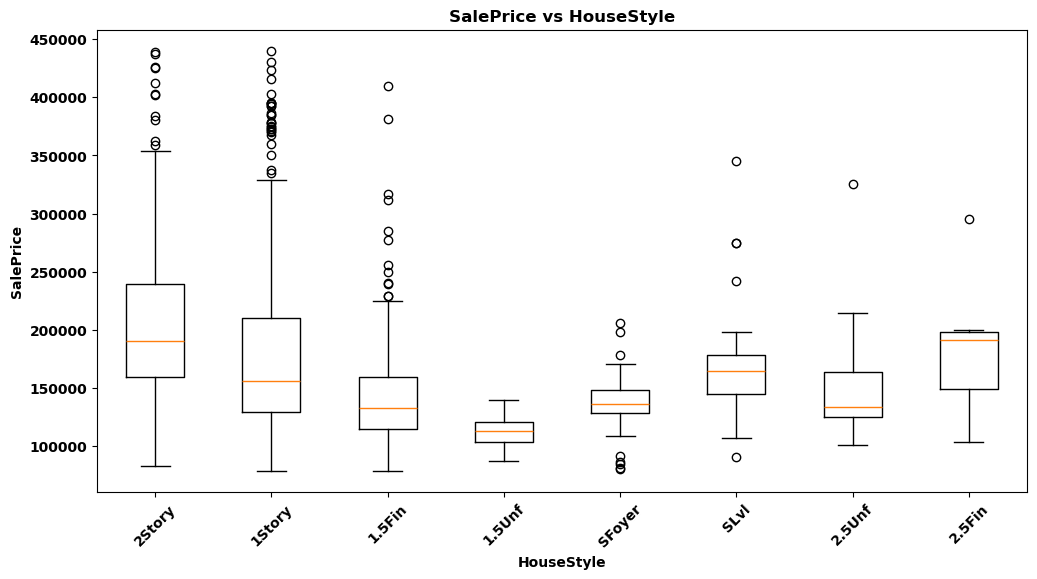

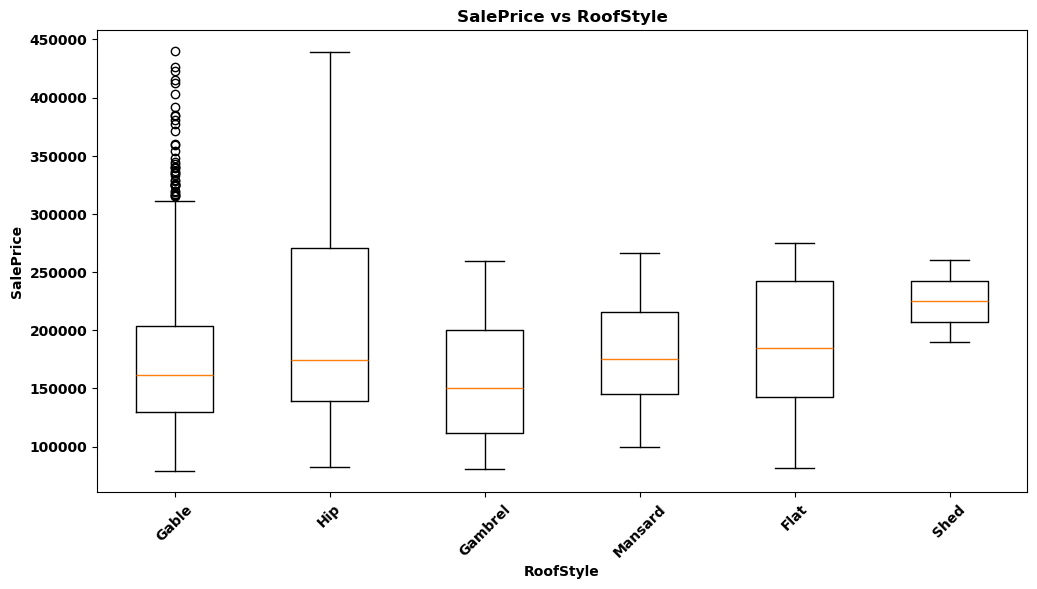

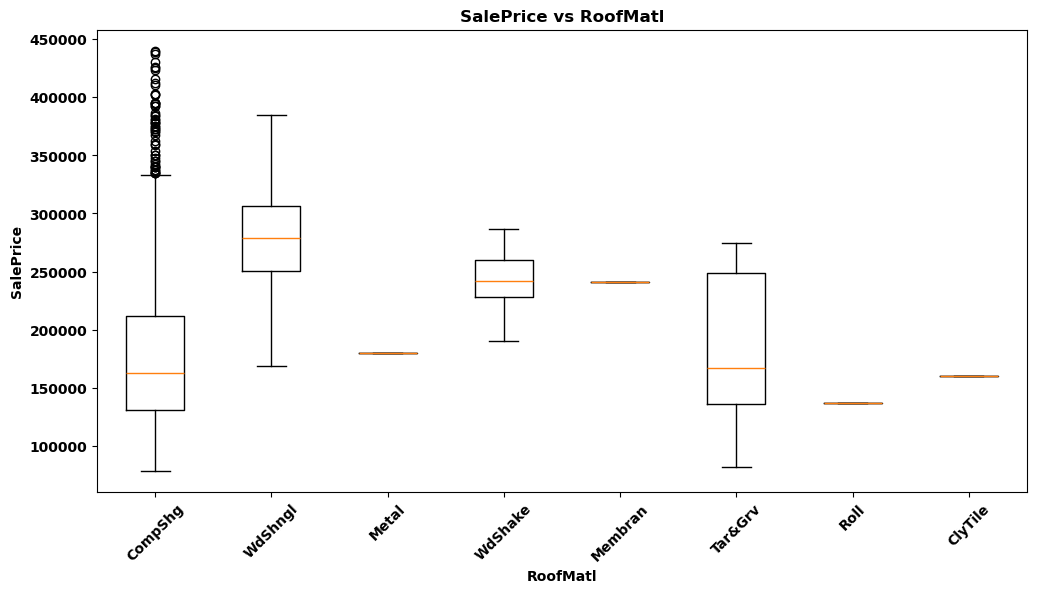

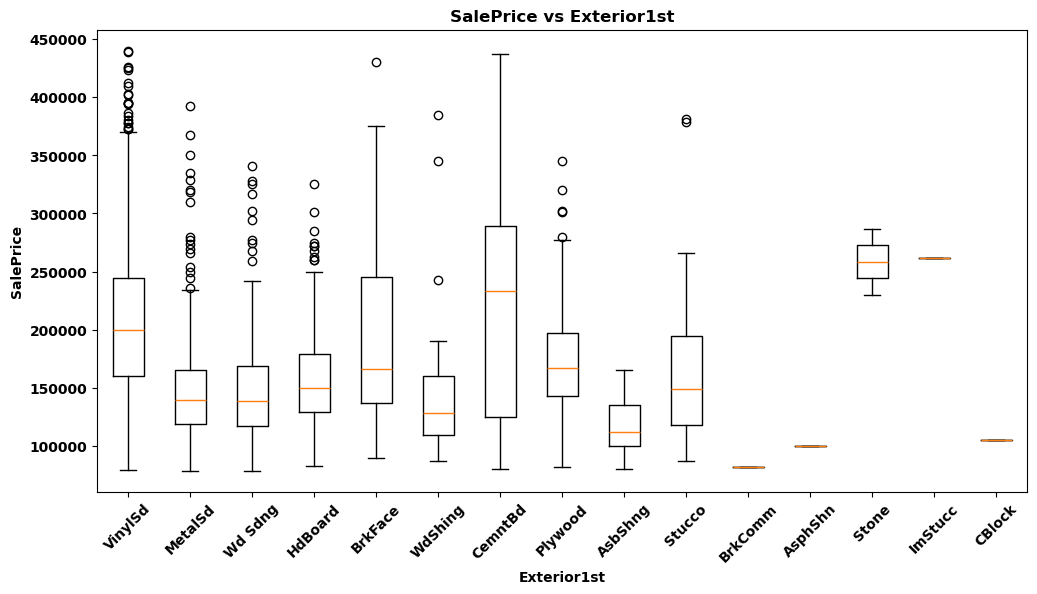

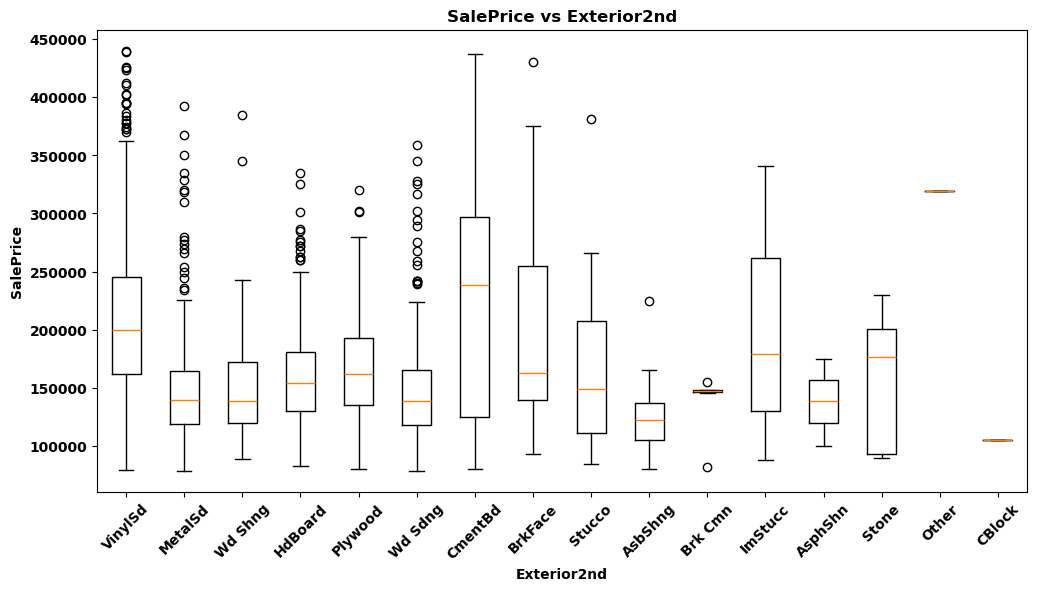

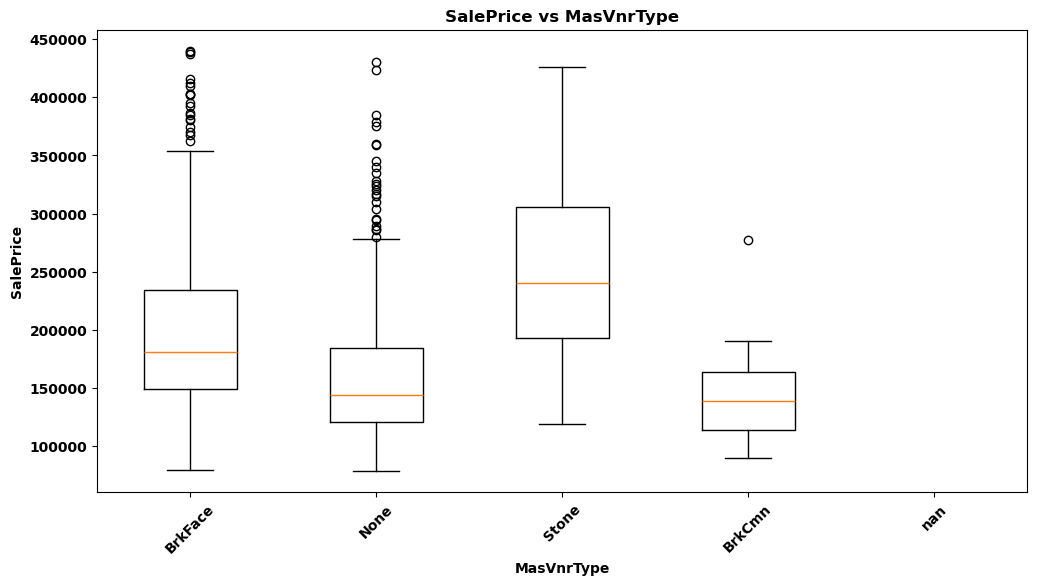

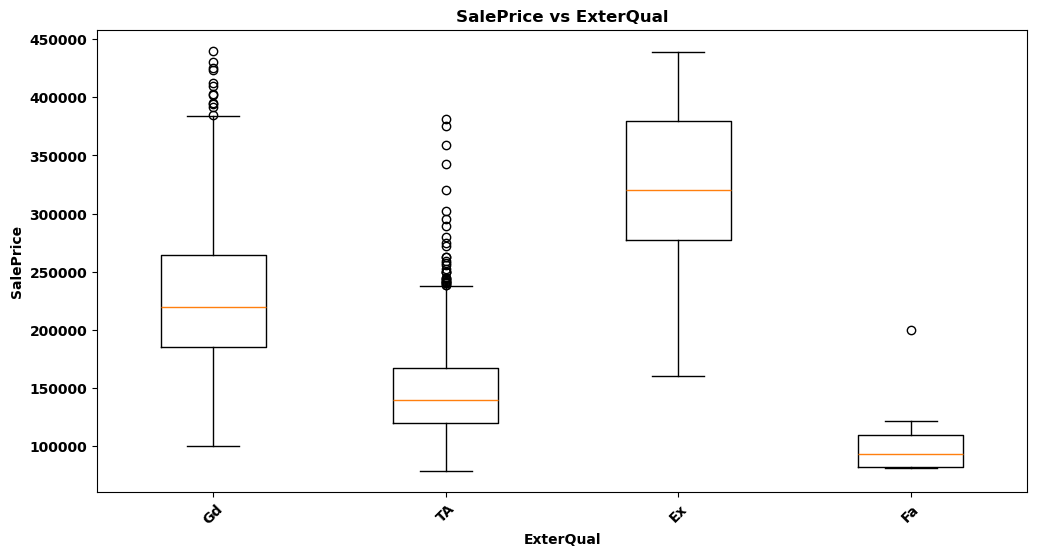

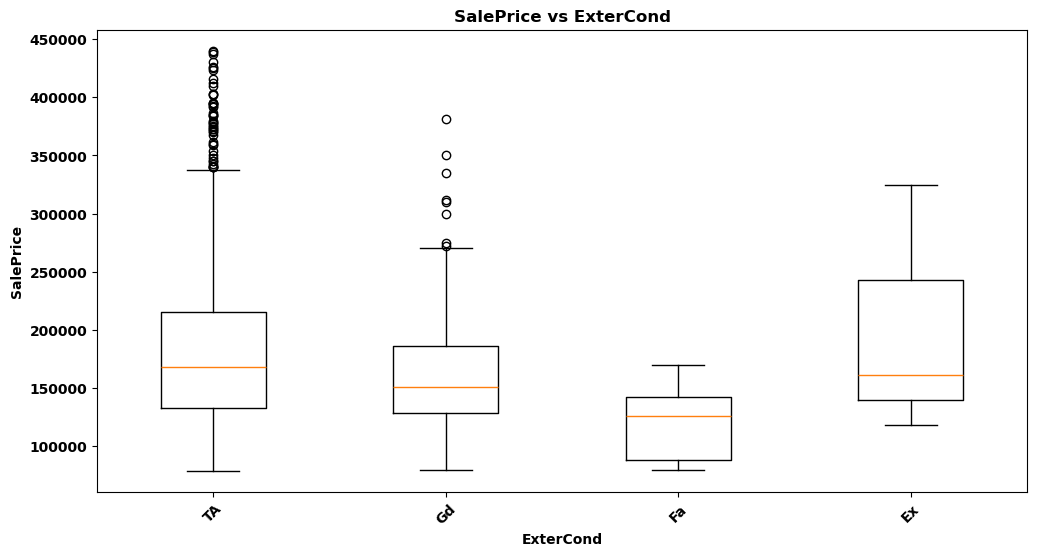

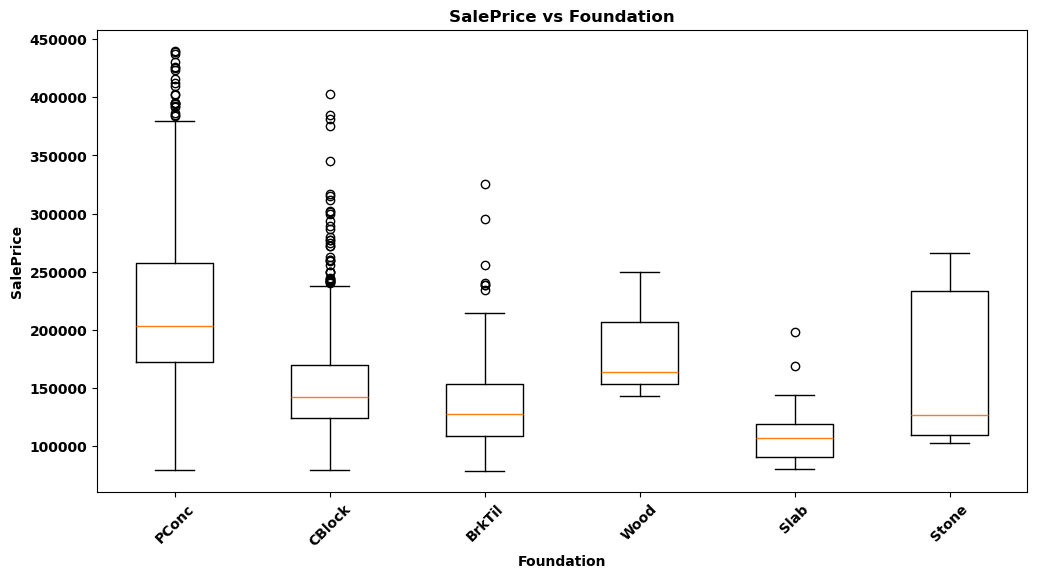

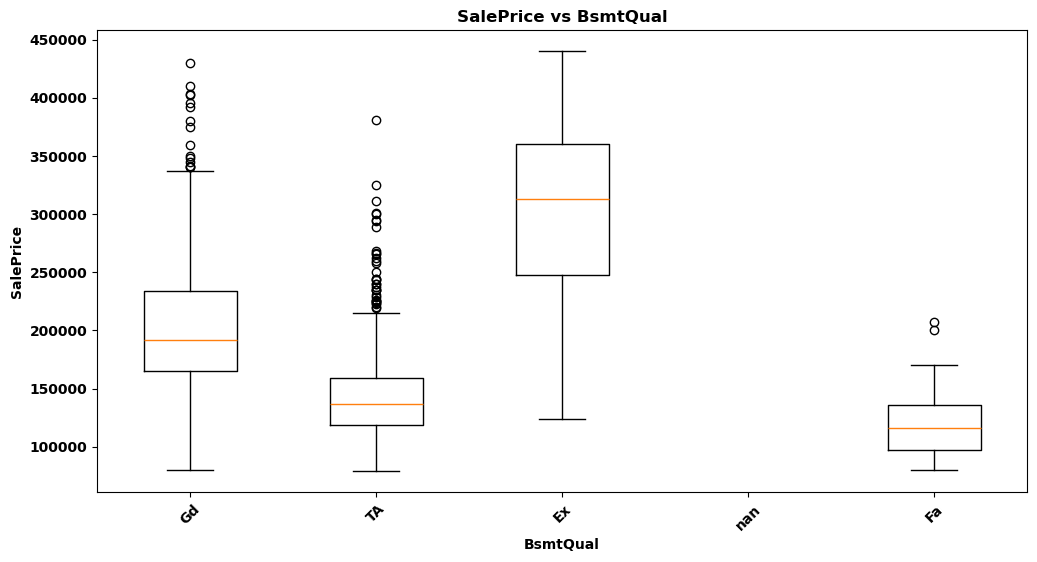

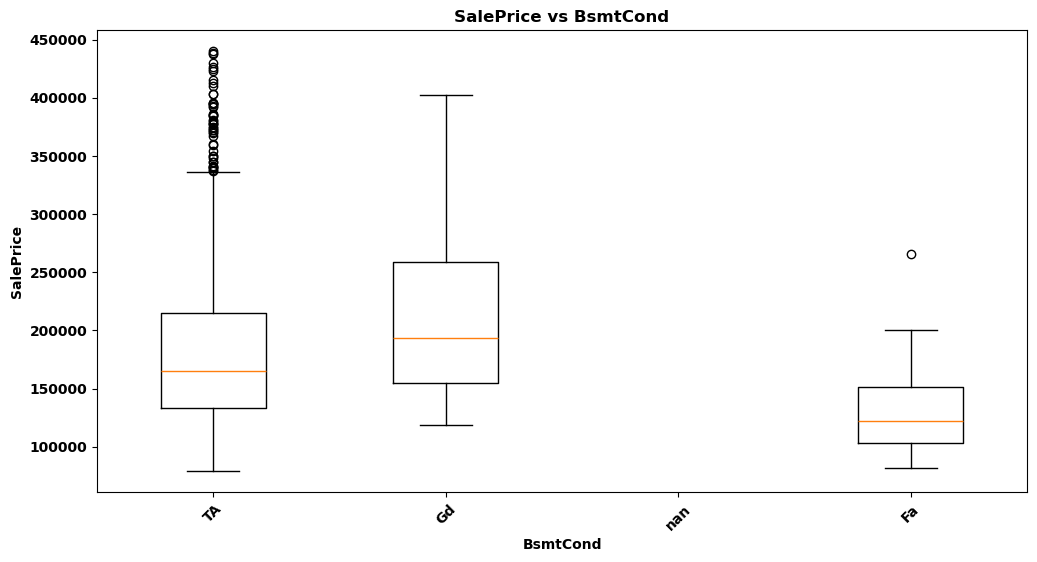

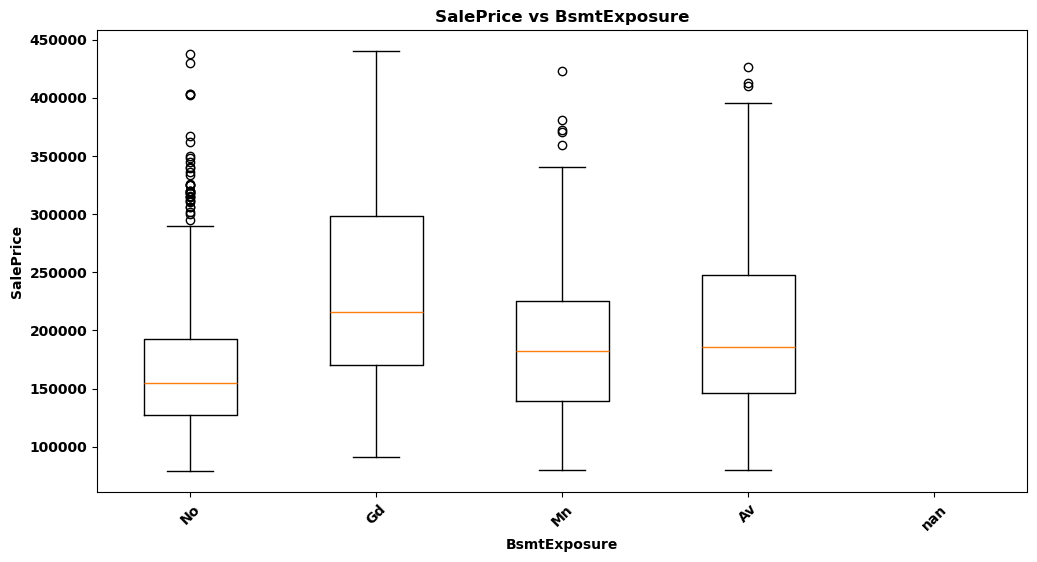

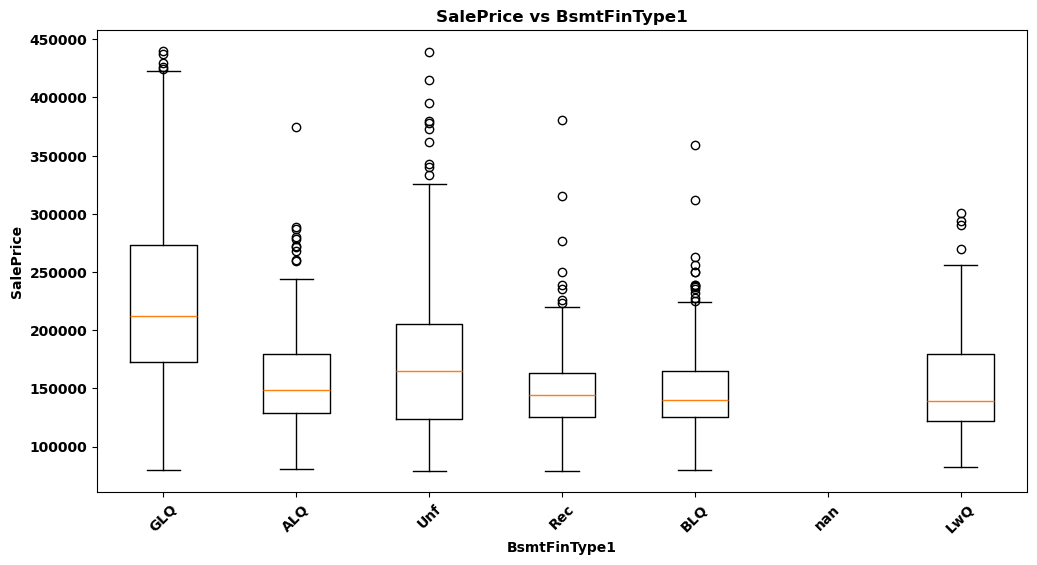

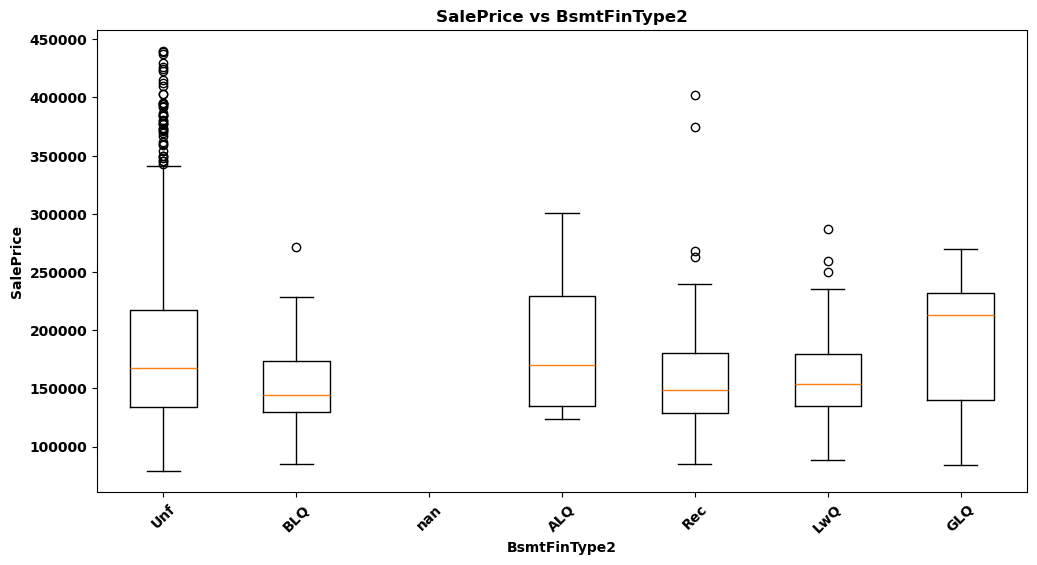

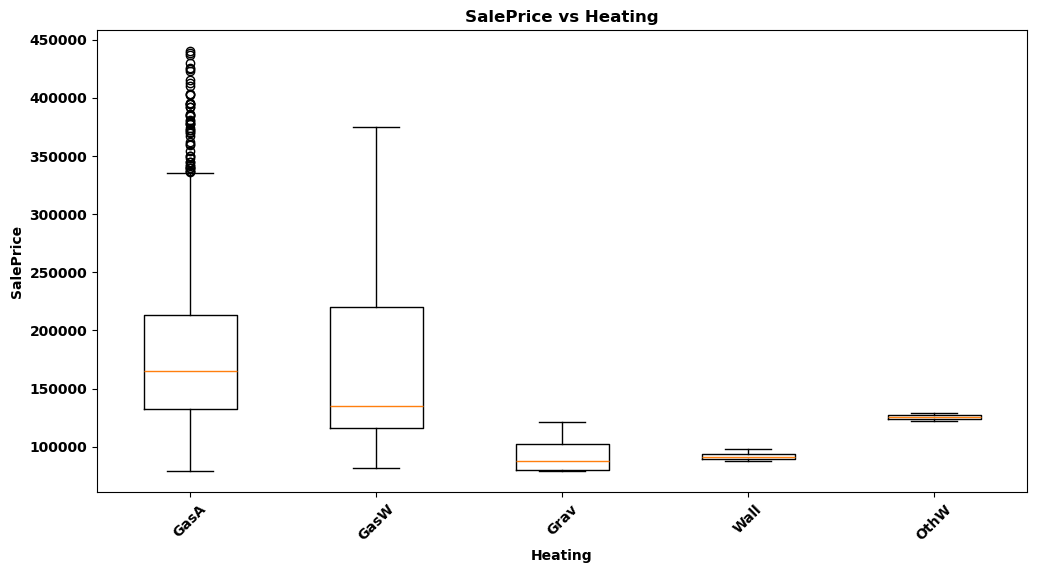

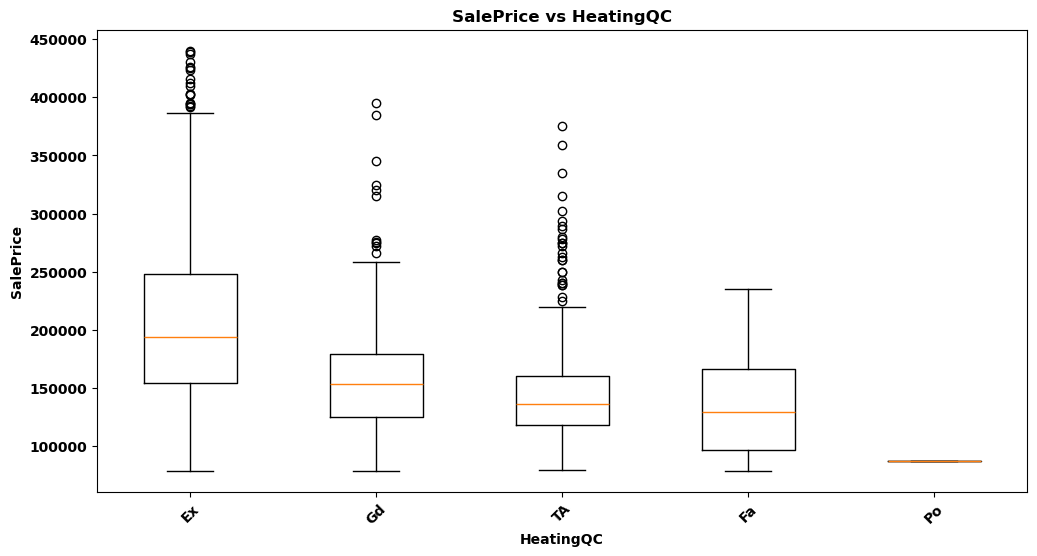

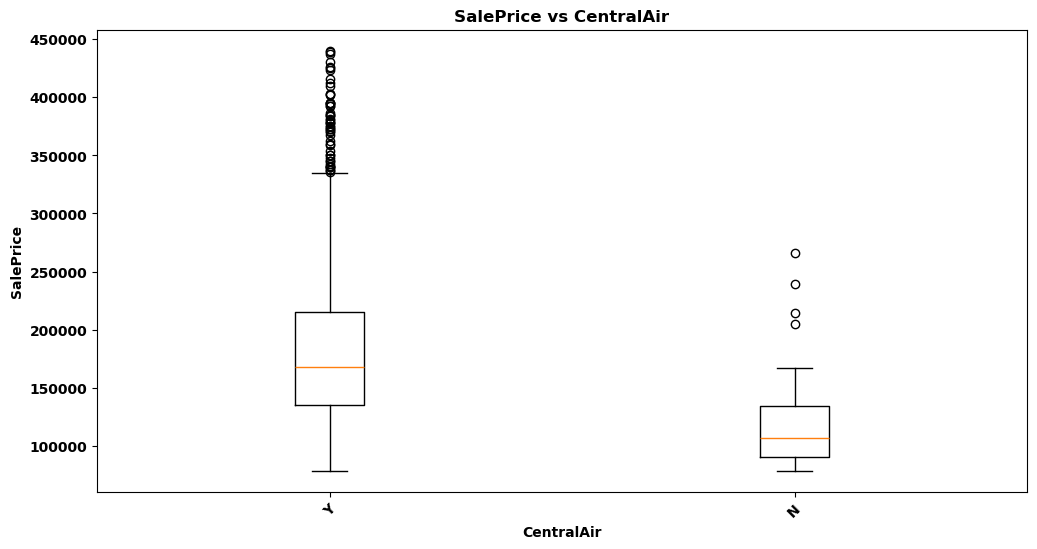

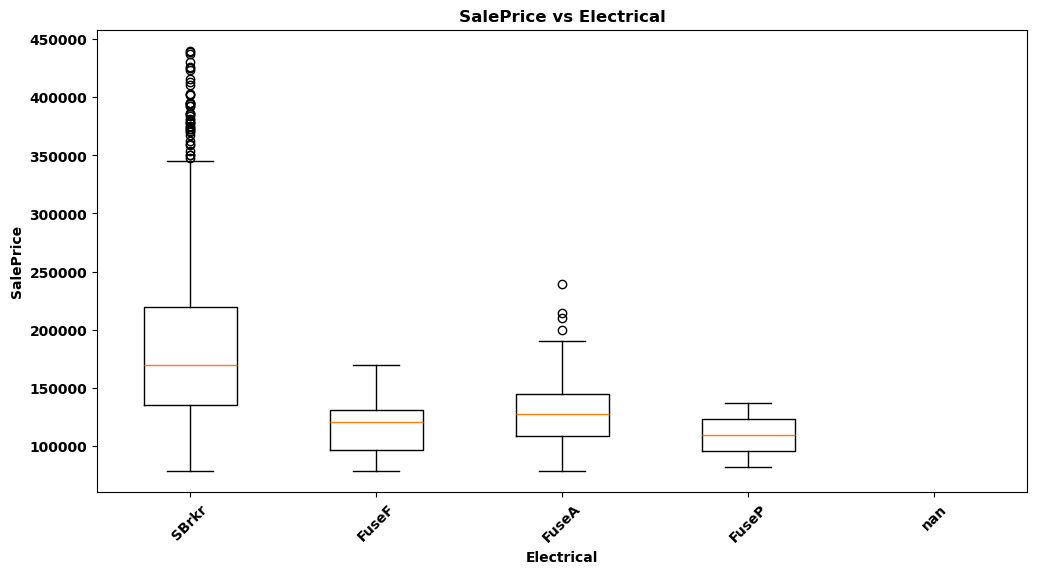

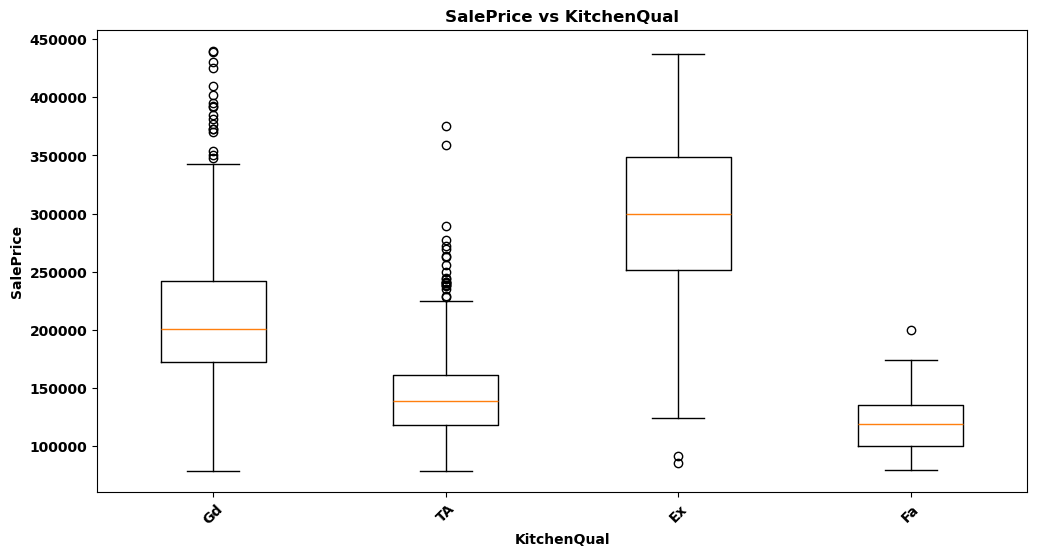

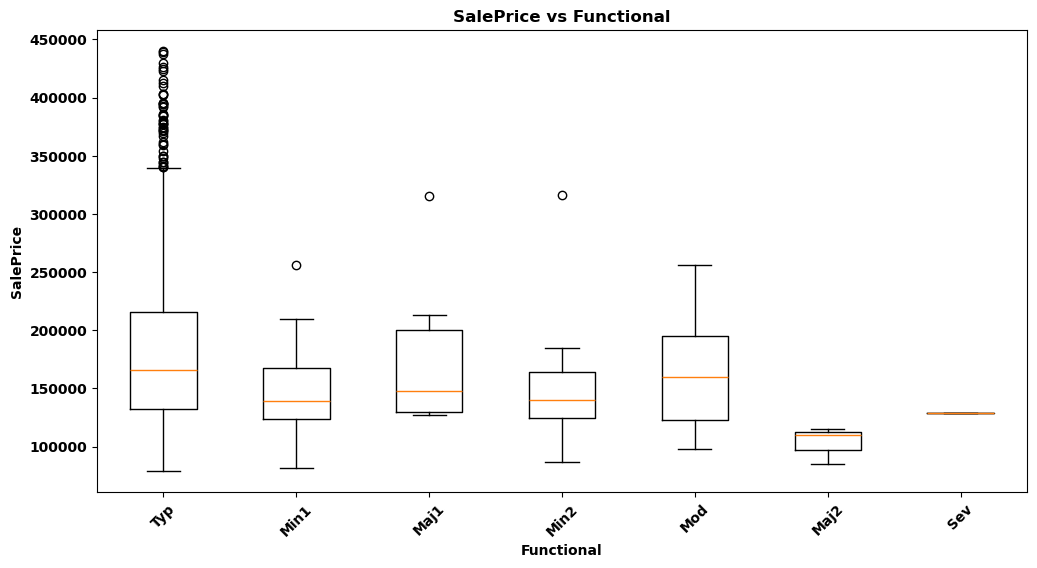

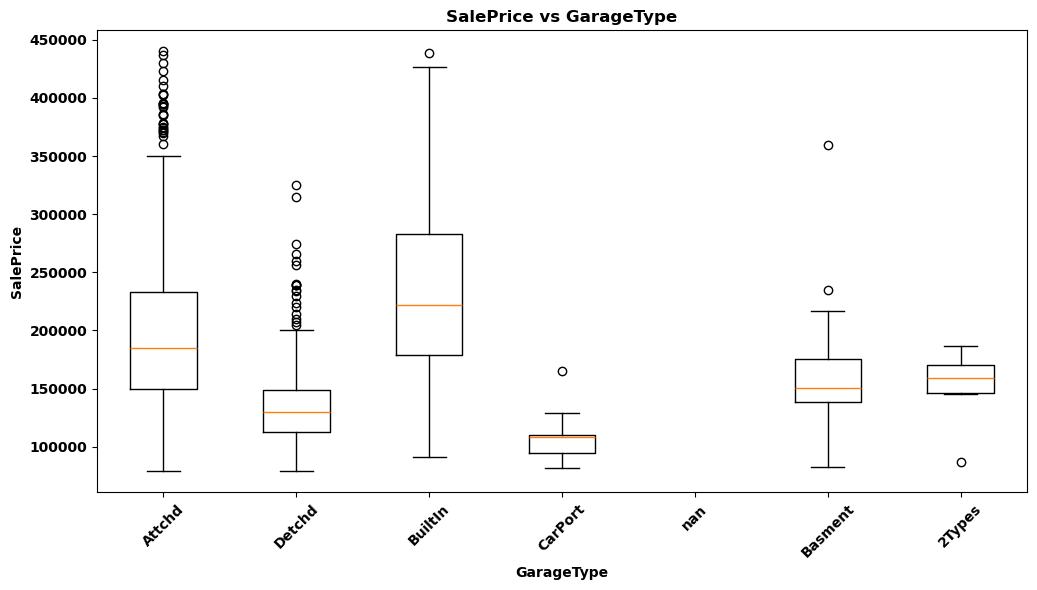

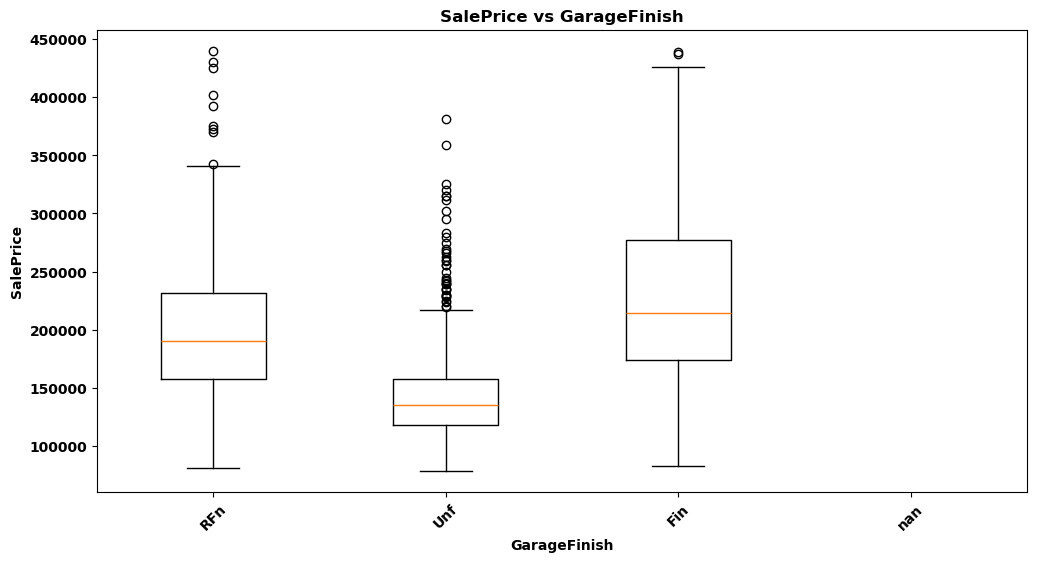

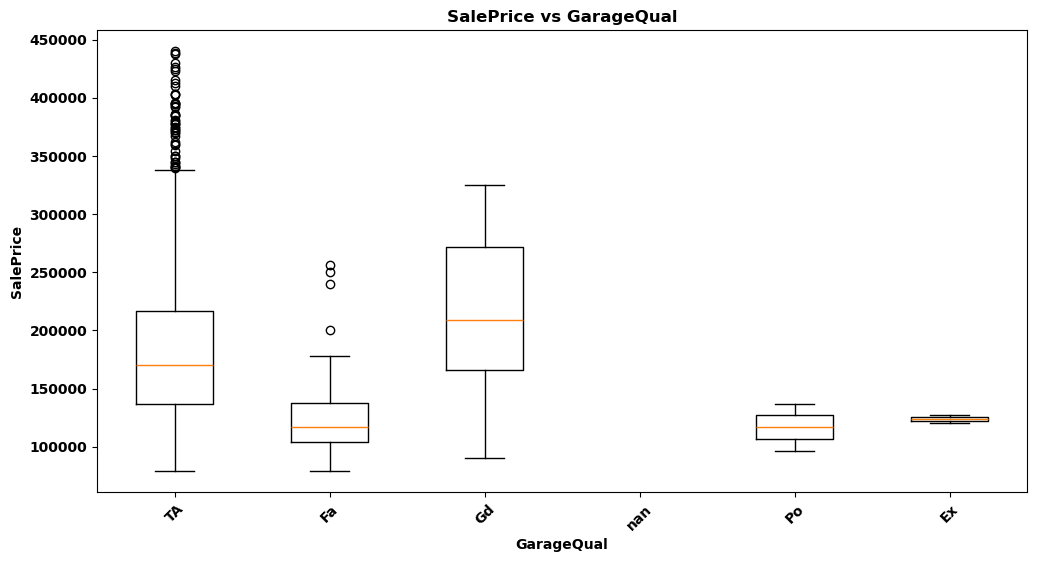

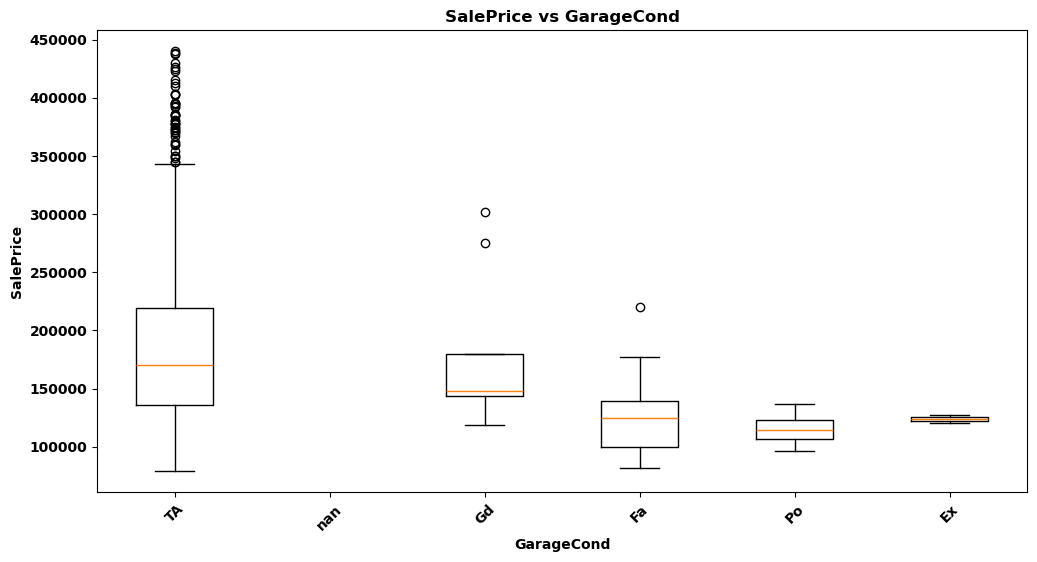

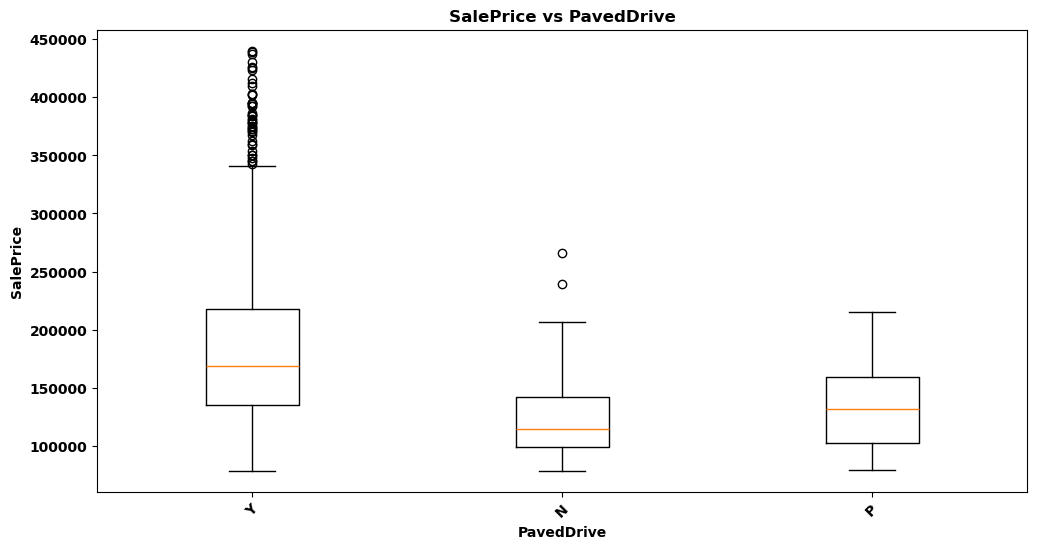

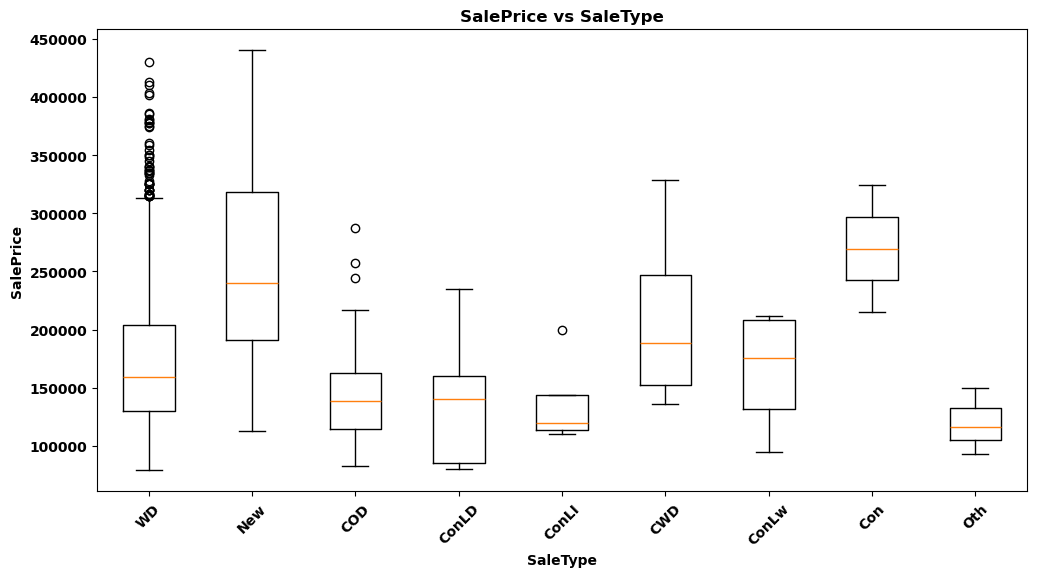

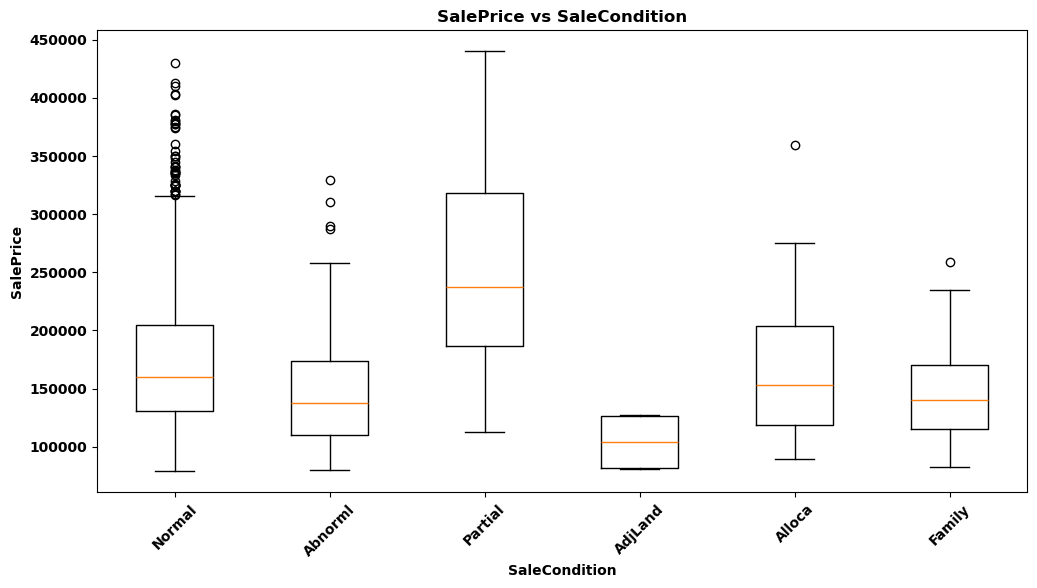

In [17]:
# Creating scatterplots of SalePrice Vs random columns
columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition' 
          ]
# Building the boxplot
for row in columns:
    plt.figure(figsize=(12,6))  # Chart size
    plt.boxplot([houses[houses[row] == category]['SalePrice'] for category in houses[row].unique()],
                labels=houses[row].unique())
    plt.title(f'SalePrice vs {row}')  # Labelling title
    plt.xlabel(row)  # Labelling x
    plt.ylabel('SalePrice')  # Labelling y
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Chat GPT: I asked to group data categories within unique values. Also checked on:
    #                   ===>  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
    #          ===> https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
    # ====> https://stackoverflow.com/questions/49586471/add-new-column-to-python-pandas-dataframe-based-on-multiple-conditions

###    From the above charts there isn't any special insight/obvervation except for the obvious: 
    - He younger is the house the highest the price.
    - Total rooms above grade also increase the price, as the minimun prices go up.
    - Full bathroom, from 2 to 3 there is a significant increase in the price
    - First floor squared feet, the more room built the higher the price.
    - The largest the basement the highest the price, makes sense, the more sqfeet built the more expensive.
    - Garage are doesn't seem to affect significantlly to the price, I guess the there is a set of ammenities that together 
      have a menaingfull impact on the price but by themself doesn't seem to affect too much. 
    - Overall quality, has in impact too
    - Ground living area.   

    It is confirmed that there are feactures that particularly affect to the price: Year constructed, open porch, pool area. 
    It seems that what distinguish highest from lowest prices are the "amenities" or extras beyond the basics like extra 
    bathroom, having a porch, or a pool is usually a reason to have houses with highest prices.

# Step 2: Preprocess the Data

## 2.1 Feature selection:  Features will be based with the premises of a basic house vs extra amenities.
    Target variable: houses['SalePrice']
## List of feactures:

* Numerical data
    * Total space built: houses['totalSpcBlt'] = houses['2ndFlrSF'] + houses['1stFlrSF'] + houses['LowQualFinSF'] + houses['TotalBsmtSF'] 
    * number of bathrooms: houses['totalBath'] = houses['BsmtFullBath'] + houses['BsmtHalfBath'] + houses['FullBath'] + houses['HalfBath'] 
    * number of bedrooms: houses['BedroomAbvGr']
    * number of livingrooms: houses['GrLivArea'] 
    * number of kitchens   houses['KitchenAbvGr']  
    * number of fireplaces: houses['Fireplaces'] 
    * Total area:     houses['LotArea'] 
    * garage:  houses['GarageCars'] ] 
FINAL LIST: 'totalSpcBlt_standardized','LotArea_standardized','GrLivArea_normalized', 'totalBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'

* Ordinal data
    * Quality: houses['Quality'] = 'External Quality' + 'Kitchen Quality'
* Categorical data
    *categorical_set = ['Foundation',
                    'MasVnrType',
                    'Exterior2nd',
                    'Exterior1st', 
                    'Neighborhood',
                    'BsmtFinType1',
                    'GarageType', 
                    'GarageFinish']




## Numerical data

* Total space built: houses['totalSpcBlt'] = houses['2ndFlrSF'] + houses['1stFlrSF'] + houses['LowQualFinSF'] + houses['TotalBsmtSF'] 
* number of bathrooms: houses['totalBath'] = houses['BsmtFullBath'] + houses['BsmtHalfBath'] + houses['FullBath'] + houses['HalfBath'] 
* number of bedrooms: houses['BedroomAbvGr']
* number of livingrooms: houses['GrLivArea'] 
* number of kitchens   houses['KitchenAbvGr']  
* number of fireplaces: houses['Fireplaces'] 
* Total area:     houses['LotArea'] 
* garage:  houses['GarageCars'] 


In [18]:
# Total space built
houses['totalSpcBlt'] = houses['2ndFlrSF'] + houses['1stFlrSF'] + houses['LowQualFinSF'] + houses['TotalBsmtSF'] 

# Total bathrooms
houses['totalBath'] = houses['BsmtFullBath'] + houses['BsmtHalfBath'] + houses['FullBath'] + houses['HalfBath'] 

print(houses['totalSpcBlt'] )
print(houses['totalBath'] )

0       2566
1       2524
2       2706
3       2473
4       3343
        ... 
1411    2600
1412    3615
1413    3492
1414    2156
1415    2512
Name: totalSpcBlt, Length: 1416, dtype: int64
0       4
1       3
2       4
3       2
4       4
       ..
1411    3
1412    3
1413    2
1414    2
1415    3
Name: totalBath, Length: 1416, dtype: int64


### Numerical data, 
## checking for outliers

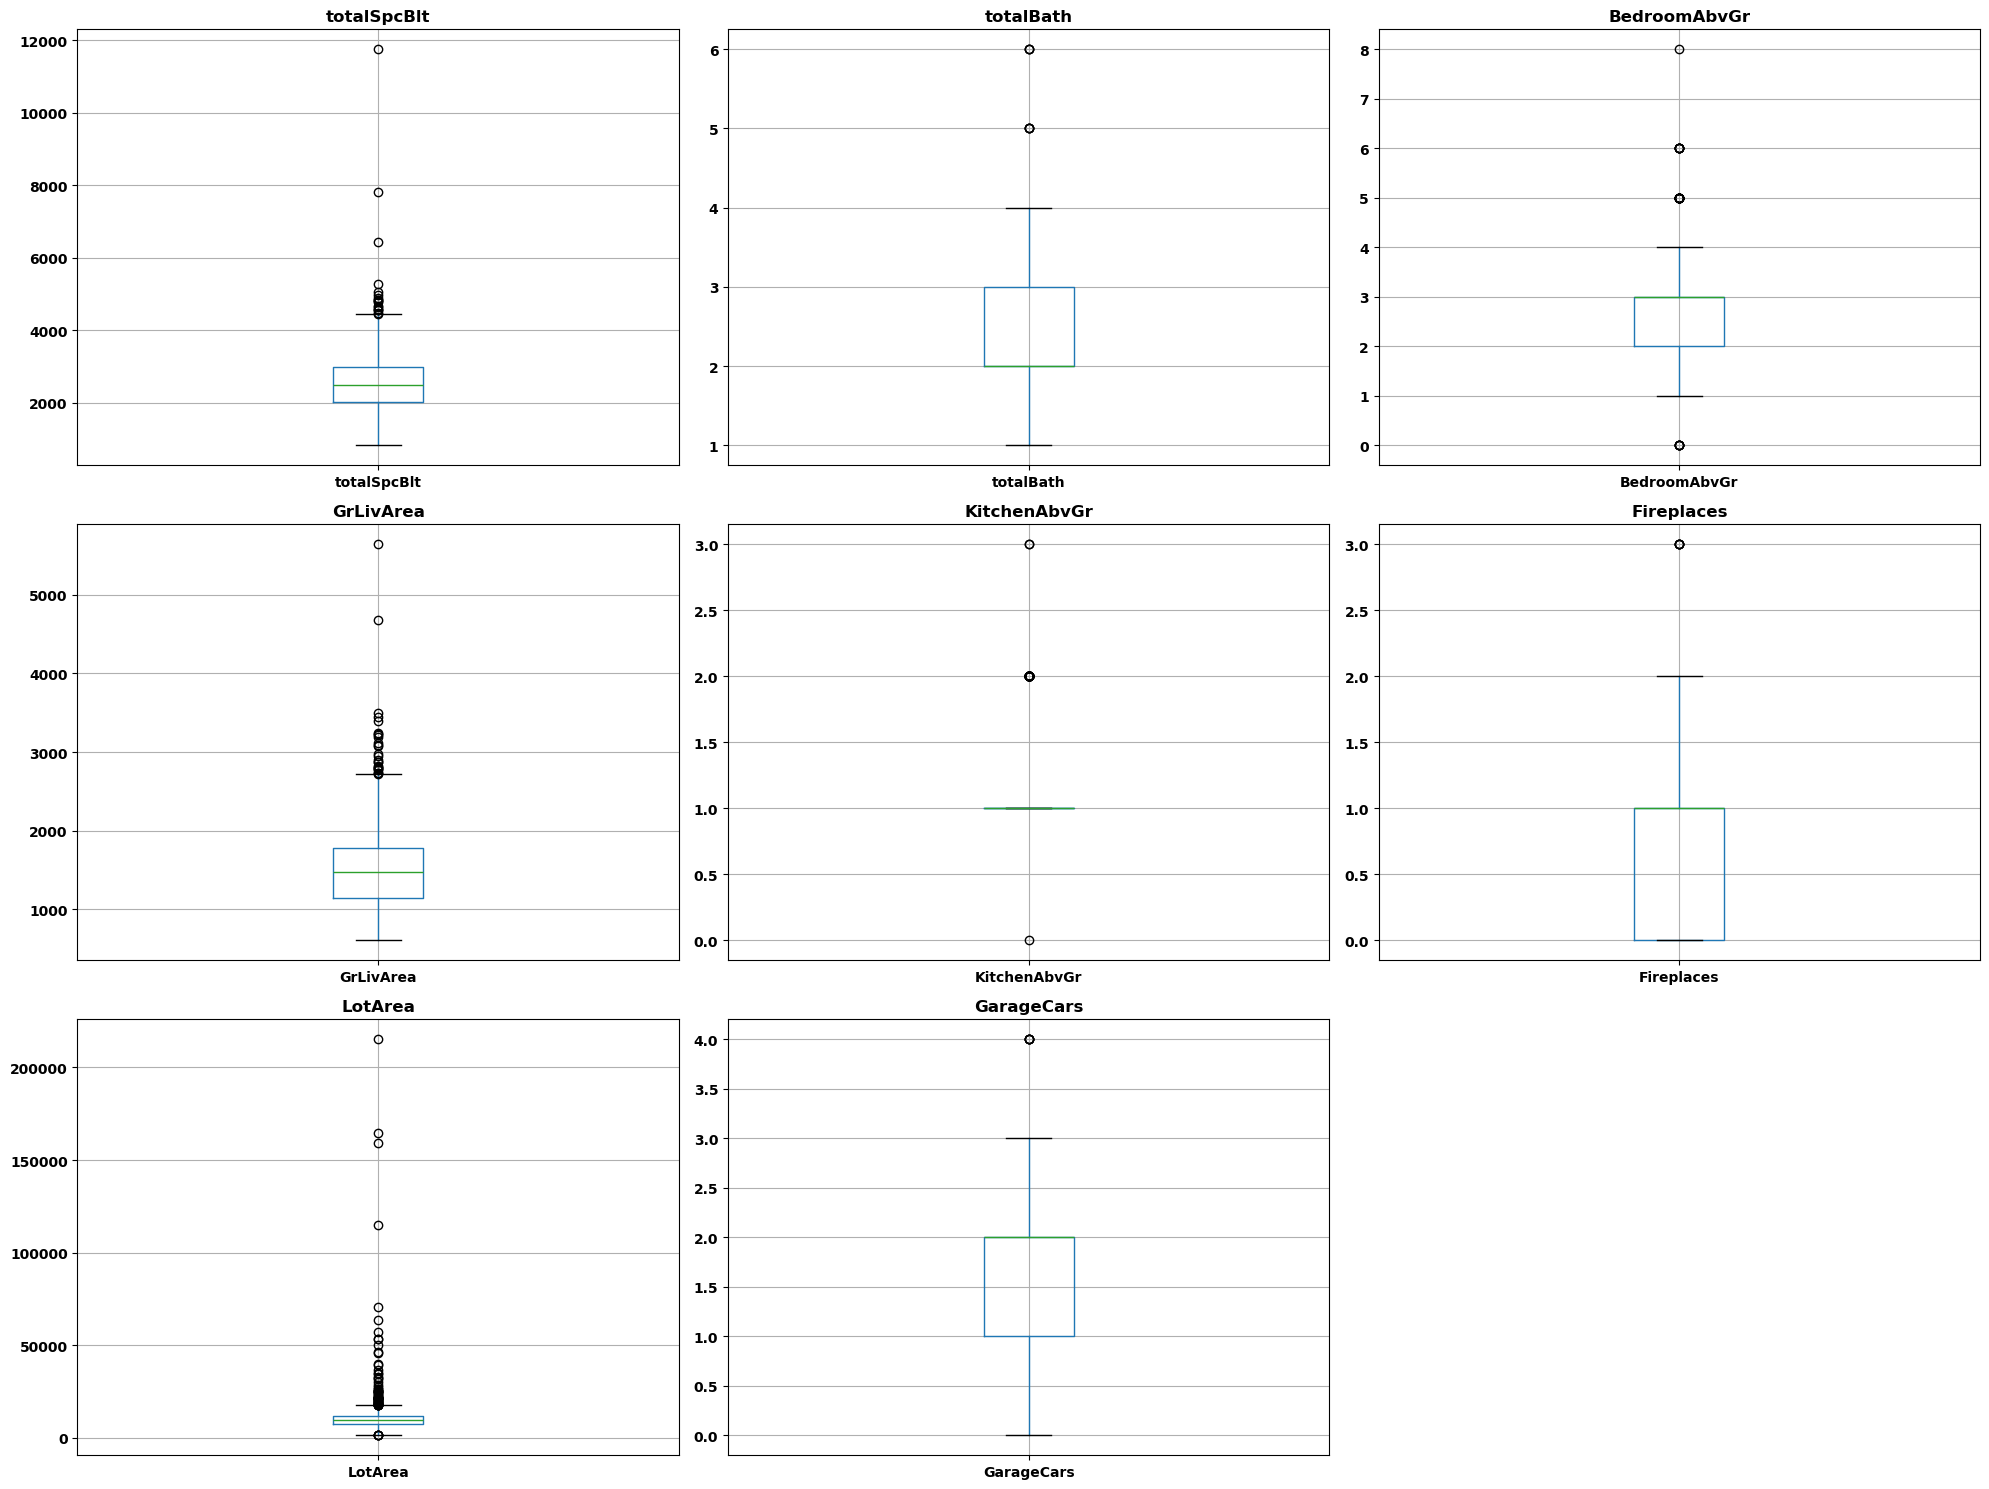

In [19]:
# Adjusting the column names for the boxplots as provided
columns = ['totalSpcBlt', 'totalBath', 'BedroomAbvGr', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'LotArea', 'GarageCars']

# Creating boxplots for each specified column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    houses.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()


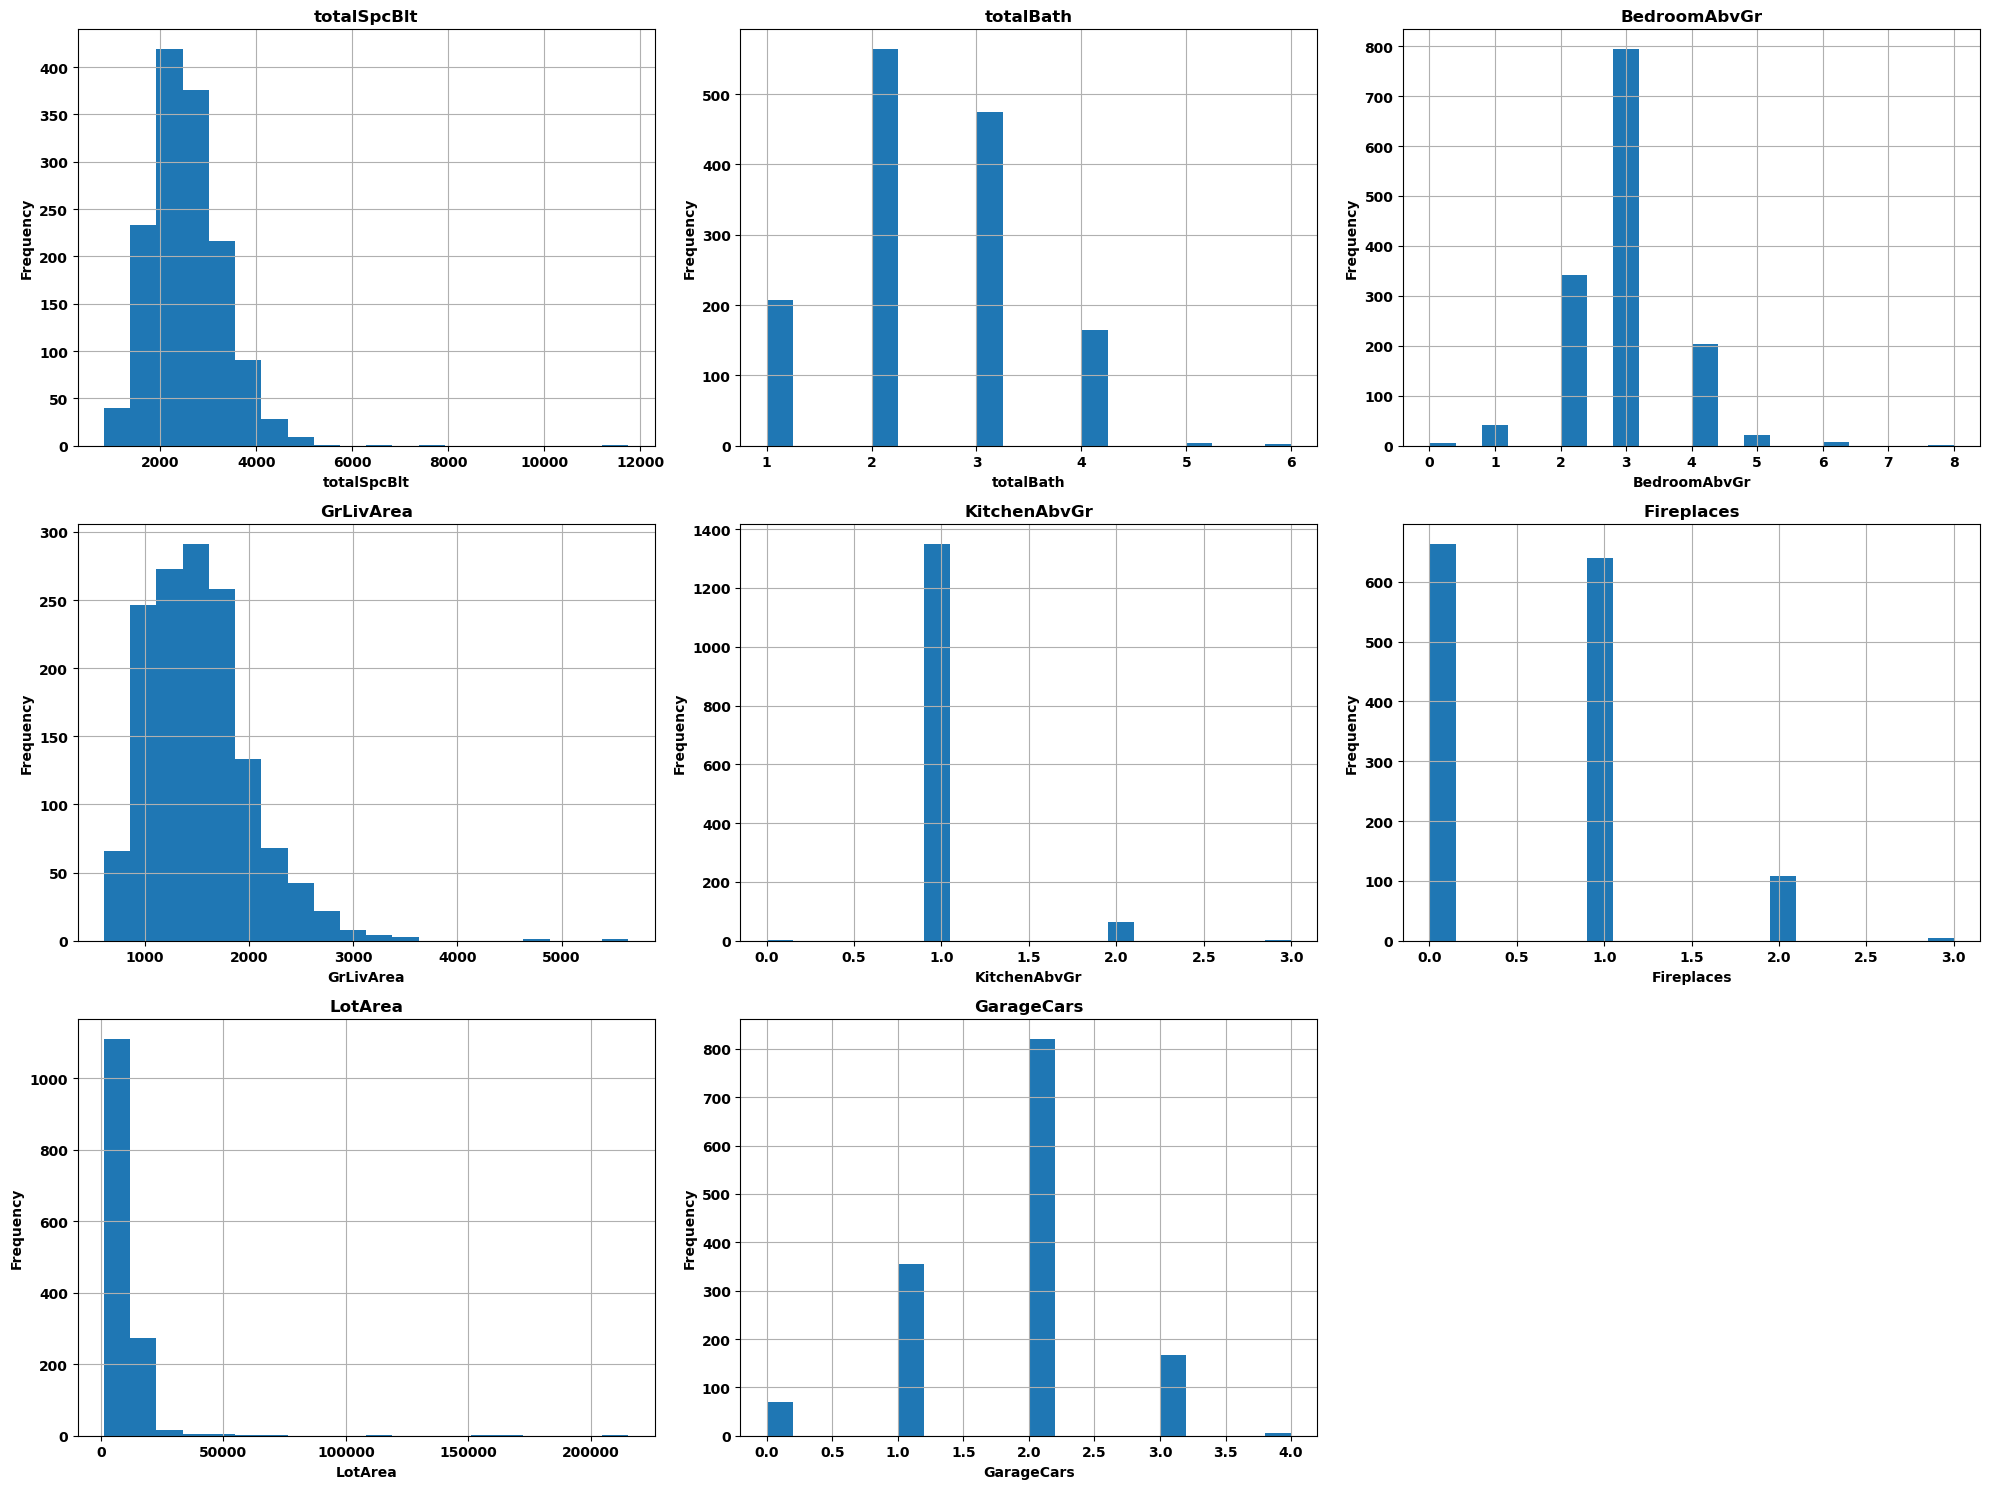

In [20]:
import matplotlib.pyplot as plt

# Assuming the 'houses' DataFrame is already defined as in the previous code example
# with the columns of interest. If the actual column names are different, they should be adjusted accordingly.

# List of columns for which histograms are needed
columns = ['totalSpcBlt', 'totalBath', 'BedroomAbvGr', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'LotArea', 'GarageCars']

# Creating histograms for each specified column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    houses[column].hist(bins=20)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# https://realpython.com/python-enumerate/
# https://www.programiz.com/python-programming/methods/built-in/enumerate

### Numerical data, 
## Deleting outliers

In [21]:
# List of columns for which to remove outliers
columns = ['totalSpcBlt', 'GrLivArea', 'LotArea']

# Removing outliers 
for column in columns:
    lower_bound = houses[column].quantile(0.03)
    upper_bound = houses[column].quantile(0.97)
    houses = houses[(houses[column] >= lower_bound) & (houses[column] <= upper_bound)]

# Optional: Reset index after filtering
houses.reset_index(drop=True, inplace=True)





## Checking distribution

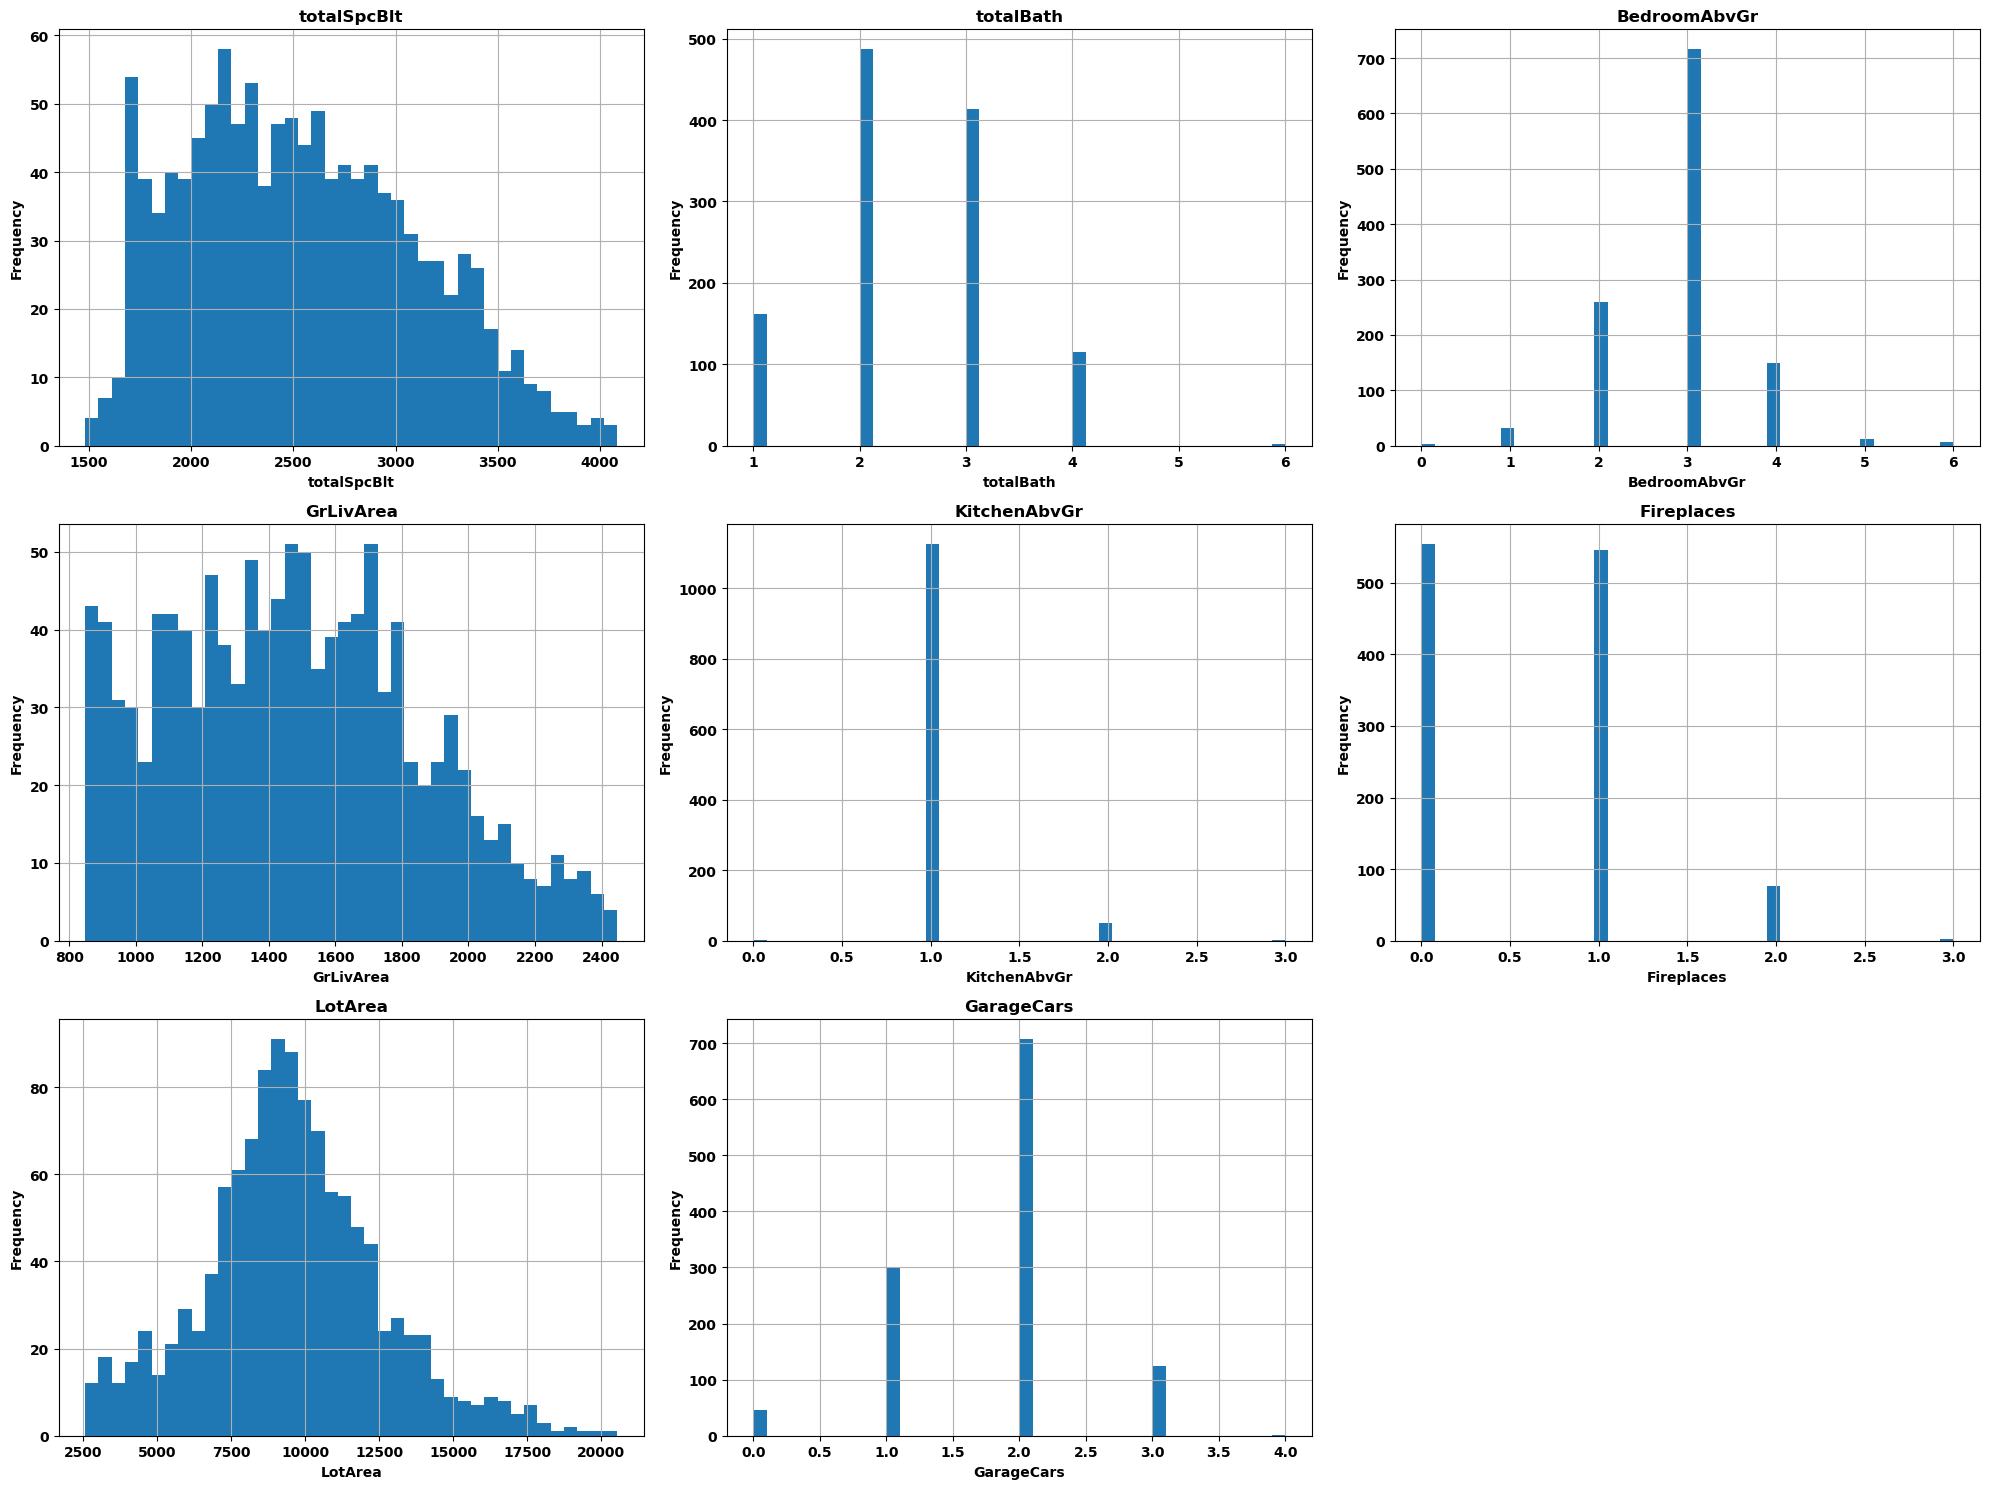

In [22]:
import matplotlib.pyplot as plt

# List of columns for which histograms are needed
columns = ['totalSpcBlt', 'totalBath', 'BedroomAbvGr', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'LotArea', 'GarageCars']

# Creating histograms for each specified column
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    houses[column].hist(bins=40)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# https://realpython.com/python-enumerate/
# https://www.programiz.com/python-programming/methods/built-in/enumerate

In [23]:
# Calculating skewness for the specified features
skewness = houses[['totalSpcBlt', 'totalBath', 'BedroomAbvGr', 'GrLivArea', 'Fireplaces', 'LotArea', 'GarageCars']].skew()
skewness


totalSpcBlt     0.364662
totalBath       0.188922
BedroomAbvGr    0.056447
GrLivArea       0.301633
Fireplaces      0.590986
LotArea         0.274549
GarageCars     -0.368539
dtype: float64

### Standarization

I will apply Standardization for totalSpcBlt, LotArea:
This technique will rescale the feature to have a mean of 0 and a standard deviation of 1.
Given the bell-shaped form of the distribution, standardization would work well, especially for linear regression, because it can handle moderate skewness and the algorithm benefits from features that are scaled and centered.
Standardization would not drastically alter the shape of the distribution, just reposition it, which is often desirable for linear models.

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
houses['totalSpcBlt_standardized'] = scaler.fit_transform(houses[['totalSpcBlt']])
houses['LotArea_standardized'] = scaler.fit_transform(houses[['LotArea']])
print(houses['totalSpcBlt_standardized'])
print(houses['LotArea_standardized'])


0       0.046194
1      -0.029048
2       0.297001
3      -0.120414
4       1.438173
          ...   
1174    0.107104
1175    1.925455
1176    1.705103
1177   -0.688312
1178   -0.050546
Name: totalSpcBlt_standardized, Length: 1179, dtype: float64
0      -0.365751
1       0.014195
2       0.559335
3      -0.002324
4       1.553802
          ...   
1174   -0.541847
1175    1.195331
1176   -0.170161
1177    0.052851
1178    0.125536
Name: LotArea_standardized, Length: 1179, dtype: float64


### Normalization
Given the left-skewed distribution and use case, standardization still seems to be the more appropriate 
preprocessing step, especially for linear regression. It will adjust for the scale of the data without distorting 
the skewness, which could be informative for the model.

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale the data between 0 and 1
min_max_scaler = MinMaxScaler()

# Fit and transform the data
houses['GrLivArea_normalized'] = min_max_scaler.fit_transform(houses[['GrLivArea']])

print(houses['GrLivArea_normalized'])


0       0.539087
1       0.258912
2       0.586617
3       0.543465
4       0.844278
          ...   
1174    0.499687
1175    0.766104
1176    0.933083
1177    0.143840
1178    0.255159
Name: GrLivArea_normalized, Length: 1179, dtype: float64


## Not Numerical Data                  

### Ordinal data

* Quality:
   houses['KitExQual'] = 'Exteranl Quality' + 'Kitchen Quality': 



In [26]:
# Checking labelling
print(houses['ExterQual'].unique())
print(houses['KitchenQual'].unique())
print(houses['BsmtQual'].unique())
print(houses['GarageQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'Fa' nan]
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']


In [27]:
print(houses['BsmtQual'].isna().sum())
print(houses['GarageQual'].isna().sum())

12
46


In [28]:
houses['BsmtQual'] = houses['BsmtQual'].dropna
print(houses['BsmtQual'].isna().sum())


0


In [29]:
print(houses['BsmtQual'].value_counts())

<bound method Series.dropna of 0       Gd\n1       Gd\n2       Gd\n3       TA\n4       Gd\n        ..\n1174    Gd\n1175    Gd\n1176    TA\n1177    TA\n1178    TA\nName: BsmtQual, Length: 1179, dtype: object>    1179
Name: BsmtQual, dtype: int64


# NOT USE BsmtQual!
# NOT USE BsmtQual!
# NOT USE BsmtQual!

In [30]:
print(houses.head())

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... MoSold YrSold SaleType SaleCondition SalePrice  \
0    Inside       Gtl  ...      2   2008       WD        Normal    208500   
1       FR2       Gtl  ...      5   2007       WD        Normal    181500   
2    Inside       Gtl  ...      9   2008       WD        Normal    223500   
3    Corner       Gtl  ...      2   2006       WD       Abnorml    140000   
4       FR2       Gtl  ...     12   2008       WD        Normal    250000   

   totalSpcBlt  totalBath  totalSpcBlt_standardized  LotArea_standardized 

In [31]:
# Quality mapping, asigning numbers to the ordinal data
quality_mapping = {
                    'Ex': 4,  # Excellent
                    'Gd': 3,  # Good
                    'TA': 2,  # Average/Typical
                    'Fa': 1,  # Fair
                    'Po': 0   # Poor
                    }
# Creating subset
Quality = ['ExterQual', 'KitchenQual']

# Mapping the columns
for column in Quality:
    houses[column] = houses[column].map(quality_mapping)
    
houses['Quality'] = houses['ExterQual'] + houses['KitchenQual']
print(houses['Quality'])

0       6
1       4
2       6
3       5
4       6
       ..
1174    4
1175    4
1176    7
1177    5
1178    5
Name: Quality, Length: 1179, dtype: int64


### Categorical data

* 'Foundation',
* 'MasVnrType',
* 'Exterior2nd',
* 'Exterior1st', 
* 'Neighborhood',
* 'BsmtFinType1',
* 'GarageType', 
* 'GarageFinish'

['Foundation',
                    'MasVnrType',
                    'Exterior2nd',
                    'Exterior1st', 
                    'Neighborhood',
                    'BsmtFinType1',
                    'GarageType', 
                    'GarageFinish']

In [32]:
categorical_set = ['Foundation',
                    'MasVnrType',
                    'Exterior2nd',
                    'Exterior1st', 
                    'Neighborhood',
                    'BsmtFinType1',
                    'GarageType', 
                    'GarageFinish'
                   ]

print(houses[categorical_set])

     Foundation MasVnrType Exterior2nd Exterior1st Neighborhood BsmtFinType1  \
0         PConc    BrkFace     VinylSd     VinylSd      CollgCr          GLQ   
1        CBlock       None     MetalSd     MetalSd      Veenker          ALQ   
2         PConc    BrkFace     VinylSd     VinylSd      CollgCr          GLQ   
3        BrkTil       None     Wd Shng     Wd Sdng      Crawfor          ALQ   
4         PConc    BrkFace     VinylSd     VinylSd      NoRidge          GLQ   
...         ...        ...         ...         ...          ...          ...   
1174      PConc       None     VinylSd     VinylSd      Gilbert          Unf   
1175     CBlock      Stone     Plywood     Plywood       NWAmes          ALQ   
1176      Stone       None     CmentBd     CemntBd      Crawfor          GLQ   
1177     CBlock       None     MetalSd     MetalSd        NAmes          GLQ   
1178     CBlock       None     HdBoard     HdBoard      Edwards          BLQ   

     GarageType GarageFinish  
0       

### Encoding categorical data

In [33]:
# Create the final dataset
houses = houses[['Id', 'SalePrice',
                 'totalBath',
                 'BedroomAbvGr',
                 'KitchenAbvGr', 
                 'Fireplaces',
                 'GarageCars',
                 'Foundation',
                    'MasVnrType',
                    'Exterior2nd',
                    'Exterior1st', 
                    'Neighborhood',
                    'BsmtFinType1',
                    'GarageType', 
                    'GarageFinish',
                'totalSpcBlt_standardized',
                 'LotArea_standardized',
                 'GrLivArea_normalized',]]

# Transform 5 categorical features
categorical_set = ['Foundation',
                    'MasVnrType',
                    'Exterior2nd',
                    'Exterior1st', 
                    'Neighborhood',
                    'BsmtFinType1',
                    'GarageType', 
                    'GarageFinish']

# One-Hot encoding
houses_final = pd.get_dummies(houses, columns=categorical_set, drop_first=True)
print(houses_final.head())

   Id  SalePrice  totalBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0   1     208500          4             3             1           0   
1   2     181500          3             3             1           1   
2   3     223500          4             3             1           1   
3   4     140000          2             3             1           1   
4   5     250000          4             4             1           1   

   GarageCars  totalSpcBlt_standardized  LotArea_standardized  \
0           2                  0.046194             -0.365751   
1           2                 -0.029048              0.014195   
2           2                  0.297001              0.559335   
3           3                 -0.120414             -0.002324   
4           3                  1.438173              1.553802   

   GrLivArea_normalized  ...  BsmtFinType1_LwQ  BsmtFinType1_Rec  \
0              0.539087  ...                 0                 0   
1              0.258912  ...                 0

In [34]:
print(houses[['totalSpcBlt_standardized','LotArea_standardized','GrLivArea_normalized', 'totalBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars']])

      totalSpcBlt_standardized  LotArea_standardized  GrLivArea_normalized  \
0                     0.046194             -0.365751              0.539087   
1                    -0.029048              0.014195              0.258912   
2                     0.297001              0.559335              0.586617   
3                    -0.120414             -0.002324              0.543465   
4                     1.438173              1.553802              0.844278   
...                        ...                   ...                   ...   
1174                  0.107104             -0.541847              0.499687   
1175                  1.925455              1.195331              0.766104   
1176                  1.705103             -0.170161              0.933083   
1177                 -0.688312              0.052851              0.143840   
1178                 -0.050546              0.125536              0.255159   

      totalBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  Garage

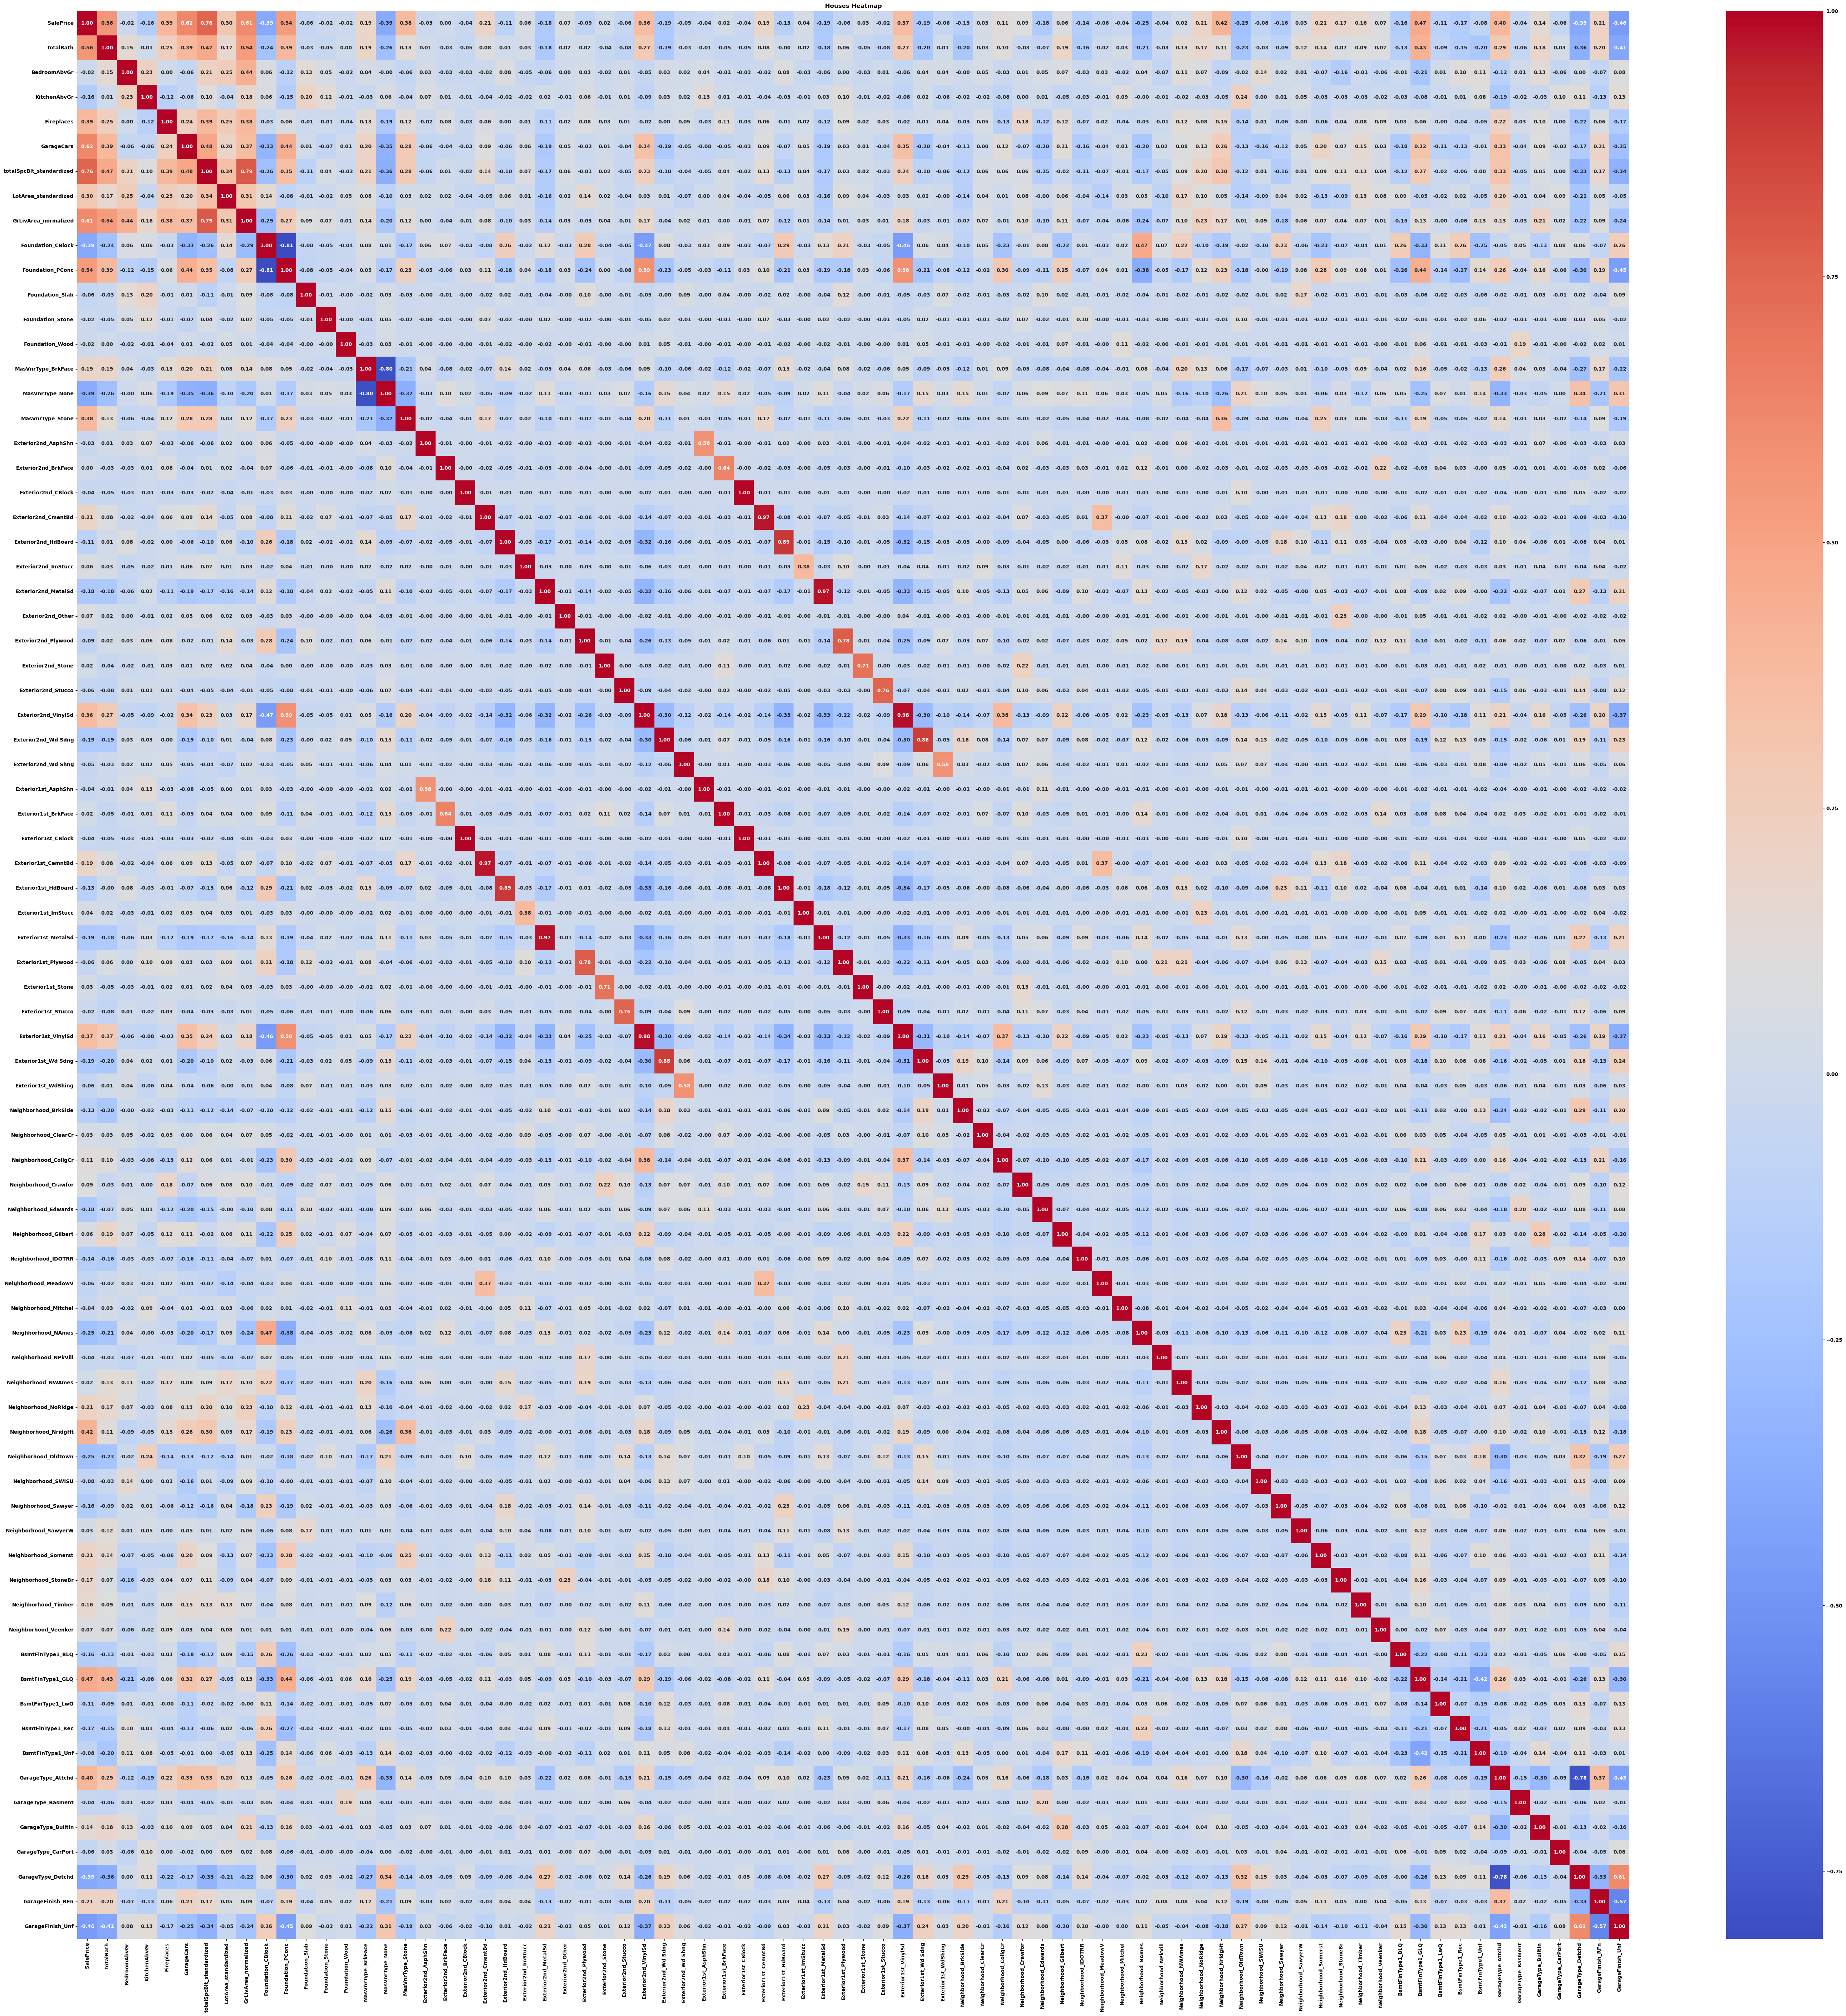

In [35]:
columns = [ 'SalePrice', 'totalBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'totalSpcBlt_standardized',
       'LotArea_standardized', 'GrLivArea_normalized', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf'
          ]

# Correlation Matrix
houses_corr = houses_final[columns].corr()

# Creating the heat map
plt.figure(figsize=(70,70)) 
sns.heatmap(houses_corr, annot=True, fmt=".2f", cmap='coolwarm')

# Labelling
plt.title('Houses Heatmap')

plt.show()

In [36]:
print(houses_final.columns)

Index(['Id', 'SalePrice', 'totalBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'totalSpcBlt_standardized',
       'LotArea_standardized', 'GrLivArea_normalized', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior

# Re choosing columns: 

In [37]:
houses_final = houses_final.drop(columns=['Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf']) 
print(houses_final.columns)

Index(['Id', 'SalePrice', 'totalBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'totalSpcBlt_standardized',
       'LotArea_standardized', 'GrLivArea_normalized', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf'],
      dtype='object')


In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(houses_final[['SalePrice', 'totalBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'totalSpcBlt_standardized',
       'LotArea_standardized', 'GrLivArea_normalized']].describe())

           SalePrice    totalBath  BedroomAbvGr  KitchenAbvGr   Fireplaces  \
count    1179.000000  1179.000000   1179.000000   1179.000000  1179.000000   
mean   177086.412214     2.414758      2.877014      1.045802     0.599661   
std     59545.792650     0.856506      0.746905      0.220985     0.620148   
min     79000.000000     1.000000      0.000000      0.000000     0.000000   
25%    135000.000000     2.000000      2.000000      1.000000     0.000000   
50%    165000.000000     2.000000      3.000000      1.000000     1.000000   
75%    206950.000000     3.000000      3.000000      1.000000     1.000000   
max    440000.000000     6.000000      6.000000      3.000000     3.000000   

        GarageCars  totalSpcBlt_standardized  LotArea_standardized  \
count  1179.000000              1.179000e+03          1.179000e+03   
mean      1.777778             -1.539210e-16         -1.936299e-16   
std       0.688110              1.000424e+00          1.000424e+00   
min       0.00000

# SAVE FINAL DATA SET


In [39]:
from scipy.io import savemat

houses_final.to_csv('houses_final.csv', index=False)
houses_final.to_csv('houses.csv', index=False)

# Convert the DataFrame to a dictionary format where keys are column names
# and values are column data.
matlab_data_dict = {col: houses_final[col].values for col in houses_final.columns}

# Save the dictionary as a MAT-file
savemat('houses_train.mat', matlab_data_dict)

matlab_data_dict = {col: houses_final[col].values for col in houses_final.columns}

# Save the dictionary as a MAT-file
savemat('houses_final.mat', matlab_data_dict)

In [40]:
house_corr = houses_final.drop('Id', axis=1).corr()

# Select correlations for SalePrice, order the figures
sale_price_corr = house_corr['SalePrice'].sort_values(ascending=False)
print(sale_price_corr)

SalePrice                   1.000000
totalSpcBlt_standardized    0.758963
GarageCars                  0.622913
GrLivArea_normalized        0.605377
totalBath                   0.562727
BsmtFinType1_GLQ            0.467693
Neighborhood_NridgHt        0.419291
Fireplaces                  0.394743
LotArea_standardized        0.298385
Neighborhood_NoRidge        0.211829
Neighborhood_Somerst        0.211714
Neighborhood_StoneBr        0.172041
Neighborhood_Timber         0.161886
Neighborhood_CollgCr        0.114707
Neighborhood_Crawfor        0.090983
Neighborhood_Veenker        0.073133
Neighborhood_Gilbert        0.060330
Neighborhood_ClearCr        0.030681
Neighborhood_SawyerW        0.030626
Neighborhood_NWAmes         0.016158
BedroomAbvGr               -0.015421
Neighborhood_Mitchel       -0.039895
Neighborhood_NPkVill       -0.041440
Neighborhood_MeadowV       -0.064587
Neighborhood_SWISU         -0.078784
BsmtFinType1_Unf           -0.079066
BsmtFinType1_LwQ           -0.112318
N

In [41]:
# Making sure there is not empty values. In case there are empty values store the results in lists.
columns_with_only_zeros = []
columns_with_empty_cells = []

# Iterate through each column to check for non-zero values and empty cells
for column in houses_final.columns:
    # Check if all values in the column are zero
    if houses_final[column].eq(0).all():
        columns_with_only_zeros.append(column)
    # Check if there are any empty cells in the column
    if houses_final[column].isnull().any():
        columns_with_empty_cells.append(column)

# Output the results
print("Columns with only zero values:", columns_with_only_zeros)
print("Columns with empty cells:", columns_with_empty_cells)


Columns with only zero values: []
Columns with empty cells: []


# New dataset # New dataset # New dataset # New dataset # New dataset

new_dataset = houses[['totalSpcBlt', 'totalBath', 'BedroomAbvGr', 'GrLivArea', 
                      'KitchenAbvGr', 'Fireplaces', 'LotArea', 'GarageCars', 'Quality']].copy()

houses_final = new_dataset.merge(houses_encoded, on='Id')

houses_final.head()  # Display the first few rows of the new dataset


final_columns = houses[['Id','totalSpcBlt', 'totalBath', 'BedroomAbvGr', 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'LotArea', 'GarageCars']]
houses_final = pd.merge(final_columns, houses_encoded, on='Id')

print(houses.columns)

# FINAL STEPS

# Checking for Multicollinearity
    By using Variance Inflation Factor VIF.
      
    Checked for Multicollinearity before saving the final dataset above. Based on the results I deleted columns with a VIF higher than 7 - 8 like "Exterior1st" (this process of deleting the columns are also made above). On the other side, even some neigbourhood have higher multicollinearity than 7 I kept them to maintain the integrity of the whole group. Now, in the following code we are just double-checking to make sure everything is right. 
    
    # Elimination of features considering VIF, based on: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Removing%20variables%20with%20high%20VIF,depending%20on%20the%20specific%20context.

In [42]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

houses_final = pd.read_csv('houses_final.csv') 
houses_final = houses_final.drop(columns=['SalePrice','Id']) 
houses_final = add_constant(houses_final)  # This adds a constant term for the intercept, this is beta 0. Adding a constant
# when calculating the VIF ensures that the linear regression assumptions are met and that the multicollinearity is accurately 
# assessed

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = houses_final.columns
vif["VIF"] = [variance_inflation_factor(houses_final.values, i) for i in range(houses_final.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
pd.set_option('display.max_rows', None)

print(vif)

# Resources: 
# https://www.statology.org/how-to-calculate-vif-in-python/
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
# https://dataunbox.com/variance-inflation-factor/
# https://dwbi1.wordpress.com/2021/04/15/linear-regression-in-python/

                     Feature         VIF
0                      const  149.828351
18        Neighborhood_NAmes   13.110969
11      Neighborhood_CollgCr    9.503098
23      Neighborhood_OldTown    6.667535
13      Neighborhood_Edwards    6.212170
14      Neighborhood_Gilbert    5.868599
25       Neighborhood_Sawyer    5.771709
27      Neighborhood_Somerst    5.598260
20       Neighborhood_NWAmes    5.528400
8       GrLivArea_normalized    5.096053
26      Neighborhood_SawyerW    4.510882
22      Neighborhood_NridgHt    4.506451
6   totalSpcBlt_standardized    4.081509
9       Neighborhood_BrkSide    3.836857
12      Neighborhood_Crawfor    3.820105
17      Neighborhood_Mitchel    3.529879
29       Neighborhood_Timber    3.044185
32          BsmtFinType1_GLQ    2.719958
15       Neighborhood_IDOTRR    2.666655
35          BsmtFinType1_Unf    2.612145
24        Neighborhood_SWISU    2.465240
21      Neighborhood_NoRidge    2.346292
1                  totalBath    2.283141
28      Neighbor

# I was getting errors and inconsistencies when trying to implement VIF so I Split the data set to try to isolate and address the issues.

In [43]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split columns in half more or less.
# houses_final = houses_final.drop(columns=['SalePrice','Id']) 
midpoint = len(houses_final.columns) // 2  # Find the midpoint to split the columns (from dataquest.io)
columns_first_half = houses_final.columns[:midpoint]
columns_second_half = houses_final.columns[midpoint:]

# Create two new DataFrames, each with 50% of the original columns
df1 = houses_final[columns_first_half]
df2 = houses_final[columns_second_half]

# Function to calculate VIF for each subset DataFrame, basically I took the previous code and place it within a function.
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = dataframe.columns
    vif_data['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calculate VIF for the first half of the DataFrame
vif_df1 = calculate_vif(df1)

# Calculate VIF for the second half of the DataFrame
vif_df2 = calculate_vif(df2)

# Results
print("VIF for df1:")
print(vif_df1)

print("\nVIF for df2:")
print(vif_df2)

# https://app.dataquest.io/m/411/best-practices-for-writing-functions/1/introducing-docstrings
# https://stackoverflow.com/questions/67940864/creating-python-function-to-iterate-over-list-dataframe-vif

VIF for df1:
                     Feature        VIF
0                      const  62.930286
1                  totalBath   1.659604
2               BedroomAbvGr   1.529896
3               KitchenAbvGr   1.155088
4                 Fireplaces   1.392181
5                 GarageCars   1.536941
6   totalSpcBlt_standardized   3.497432
7       LotArea_standardized   1.285269
8       GrLivArea_normalized   4.158425
9       Neighborhood_BrkSide   1.093185
10      Neighborhood_ClearCr   1.016541
11      Neighborhood_CollgCr   1.110704
12      Neighborhood_Crawfor   1.087913
13      Neighborhood_Edwards   1.097492
14      Neighborhood_Gilbert   1.140299
15       Neighborhood_IDOTRR   1.066689
16      Neighborhood_MeadowV   1.035538
17      Neighborhood_Mitchel   1.043559

VIF for df2:
                 Feature       VIF
0     Neighborhood_NAmes  1.407728
1   Neighborhood_NPkVill  1.004855
2    Neighborhood_NWAmes  1.049106
3   Neighborhood_NoRidge  1.055651
4   Neighborhood_NridgHt  1.142987
5  

### Other Places checked: 
   https://monirah-abdulaziz.medium.com/house-prices-data-cleaning-ec45bb960a1
   
   
   https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
   
   https://pandas.pydata.org/docs/user_guide/options.html

   https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

#### Questions - guidance - ideas: 
    a) What about numer of houses sold per year?
    b) Interaction Effects: Investigate how combinations of features interact to affect the SalePrice. For example, what is the combined effect of 'GrLivArea' and 'OverallQual'? Sometimes, the interaction between variables can be more predictive than the variables on their own.
    c) Advanced Feature Engineering: Look at creating new features from the existing ones. For instance, consider the age of the property at the time of sale ('YrSold' - 'YearBuilt'), or create a feature that represents the overall size of the house combining 'TotalBsmtSF', '1stFlrSF', and '2ndFlrSF'.
    d) Polynomial Features: Similarly, introducing polynomial features (e.g., square or cube of a given feature) could uncover non-linear relationships that are more effectively captured by a decision tree.
    